In [20]:
import torch
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__Memory Allocated (Device):',torch.cuda.memory_allocated())
    print('__Max Memory Allocated:',torch.cuda.max_memory_allocated()/1e6)
    print('__Memory Reserved:',torch.cuda.memory_reserved()/1e9)
    print('__Currently used device:', torch.cuda.current_device())
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0))#.total_memory/1e6)

__Memory Allocated (Device): 0
__Max Memory Allocated: 0.0
__Memory Reserved: 0.0
__Currently used device: 0
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 2080 SUPER
__CUDA Device Total Memory [GB]: _CudaDeviceProperties(name='NVIDIA GeForce RTX 2080 SUPER', major=7, minor=5, total_memory=7969MB, multi_processor_count=48)


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !python --version


In [4]:
# !pip3 install text-preprocessing

# !pip3 install nltk
# !pip3 install lexical-diversity
#!pip3 install trunajod
#!pip3 install lexicalrichness

In [22]:
import os
import csv 
import numpy as np
import pandas as pd
import random
import math
import ast
import re
import regex
import string
#import functools
from functools import reduce
import operator  
import warnings

from itertools import groupby
from collections import OrderedDict
from collections import defaultdict
from datetime import datetime
from datetime import date
from ast import literal_eval

import urllib
import requests
import json
import shutil
import time
import fnmatch
from pathlib import Path


#import PyPaperBot
import nltk
import fitz
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

import pickle
from text_preprocessing import preprocess_text
from text_preprocessing import *

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [23]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf

from scipy.stats import shapiro
from scipy.stats import normaltest

import pylab 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

#!pip3 install sklearn_pandas
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
import textacy
from textacy import text_stats as ts
from textacy import extract
from textacy import preprocessing

import textstat  # https://pypi.org/project/textstat/

#import textract  # To read .docx files
import spacy
import tarfile
import TRUNAJOD.givenness
import TRUNAJOD.ttr
# from TRUNAJOD import surface_proxies
from TRUNAJOD.syllabizer import Syllabizer

from TRUNAJOD import surface_proxies
from TRUNAJOD.entity_grid import EntityGrid
from TRUNAJOD.lexico_semantic_norms import LexicoSemanticNorm

from lexicalrichness import LexicalRichness

from lexical_diversity import lex_div as ld # https://pypi.org/project/lexical-diversity/
#from textacy.text_stats import basics, counts, diversity, readability

In [25]:
nltk.download('stopwords')
nltk.download('words')
# !python -m spacy download en_core_web_sm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/psych256lab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/psych256lab/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords as sw
#stop_words = stopwords.words('english')
stop_words = sw.words('english')

vocab = set(w.lower() for w in nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [5]:
class ModelLoader(object):
    """Class to load model."""
    def __init__(self, model_file):
        tar = tarfile.open(model_file, "r:gz")
        self.crea_frequency = {}
        self.infinitive_map = {}
        self.lemmatizer = {}
        self.spanish_lexicosemantic_norms = {}
        self.stopwords = {}
        self.wordnet_noun_synsets = {}
        self.wordnet_verb_synsets = {}

        for member in tar.getmembers():
            f = tar.extractfile(member)
            if "crea_frequency" in member.name:
                self.crea_frequency = pickle.loads(f.read())
            if "infinitive_map" in member.name:
                self.infinitive_map = pickle.loads(f.read())
            if "lemmatizer" in member.name:
                self.lemmatizer = pickle.loads(f.read())
            if "spanish_lexicosemantic_norms" in member.name:
                self.spanish_lexicosemantic_norms = pickle.loads(f.read())
            if "stopwords" in member.name:
                self.stopwords = pickle.loads(f.read())
            if "wordnet_noun_synsets" in member.name:
                self.wordnet_noun_synsets = pickle.loads(f.read())
            if "wordnet_verb_synsets" in member.name:
                self.wordnet_verb_synsets = pickle.loads(f.read())


# Load TRUNAJOD models
model = ModelLoader("trunajod_models_v0.1.tar.gz")

In [11]:
# for reproducibility
np.random.seed(1)

In [28]:
filterd_articlePolicyList2 = pd.read_csv('filterd_articlePolicyList.csv', encoding='utf-8')

In [29]:
filterd_articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         2301 non-null   object 
 1   title                       2301 non-null   object 
 2   policyList                  2301 non-null   object 
 3   policyTitles                2301 non-null   object 
 4   USApolicyCitation           2301 non-null   int64  
 5   successful_policyList       2301 non-null   object 
 6   successful_policyTitles     2301 non-null   object 
 7   articlePdf                  2301 non-null   object 
 8   total_successful_policy     2301 non-null   int64  
 9   successfulPolicyPercentage  2301 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 179.9+ KB


In [30]:
filterd_articlePolicyList2.set_index('url', inplace =True)
# filterd_articlePolicyList2.at['https://doi.org/10.1001/archderm.139.3.318','articlePdf']

In [31]:
filterd_articlePolicyList2.policyTitles = filterd_articlePolicyList2.policyTitles.apply(literal_eval)
filterd_articlePolicyList2.policyList =  filterd_articlePolicyList2.policyList.apply(literal_eval)                
filterd_articlePolicyList2.successful_policyList = filterd_articlePolicyList2.successful_policyList.apply(literal_eval)
filterd_articlePolicyList2.successful_policyTitles = filterd_articlePolicyList2.successful_policyTitles.apply(literal_eval)
#filterd_articlePolicyList2.articlePdf = filterd_articlePolicyList2.articlePdf.apply(literal_eval)

In [11]:
new_columns =['char_count','letter_count','word_count', 'syllable_count','monosyllabcount','polysyllabcount','sentence_count',\
              'avg_word_length','average_sentence_length','avg_syllables_per_word',\
              'n_unique_words', 'n_long_words','n_difficult_words','avg_n_unique_words','avg_n_long_words','avg_n_difficult_words', \
              
              'avg_noun_count','avg_verb_count','avg_adverb_count','avg_adjective_count','avg_conjunction_count','avg_adposition_count','imp_pos_ratio',\
              
              'frequency_index','pos_dissimilarity','syntactic_similarity','words_before_root',\
            
              
              'lex_ttr','lex_rttr','lex_cttr','lex_maas','lex_msttr','lex_mattr','lex_hdd','lex_mtld',\
              'lex_vocd','lex_herdan','lex_summer','lex_dugast','lex_yulek','lex_yulei','lex_herdanvm','lex_simpsond',
              
              'reading_time','smog_index','flesch_reading_ease','flesch_kincaid_grade','automated_readability_index','gunning_fog','coleman_liau_index','dale_chall_readability_score','linsear_write_formula','mcalpine_eflaw'
              ]

In [15]:
len(new_columns)

53

In [16]:
for column in new_columns:
    #new_similarity_column = f"{model}_sim"
    filterd_articlePolicyList2[column]=0.0

In [17]:
#filterd_articlePolicyList2.info()

In [18]:
# #Load sentences & embeddings from disc
with open('article_sentences.pkl', "rb") as fIn:
    article_sentences = pickle.load(fIn)
#filterd_articlePolicyList2.info()


In [19]:
# doi = 'https://doi.org/10.9778/cmajo.20190026'

#article_sentences[doi]  

In [20]:
def lexical_analysis(index: str, text:str):
    doc = textacy.make_spacy_doc(text, lang="en_core_web_sm")
    ts1 = ts.TextStats(doc)
    nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])
    doc1 = nlp(text)
    
    word_count = textstat.lexicon_count(text, removepunct=True)
    if (word_count>499):
    
        filterd_articlePolicyList2.at[index,'char_count'] = textstat.char_count(text, ignore_spaces=True)
        filterd_articlePolicyList2.at[index,'letter_count'] = textstat.letter_count(text, ignore_spaces=True)
        filterd_articlePolicyList2.at[index,'word_count'] = word_count
        filterd_articlePolicyList2.at[index,'syllable_count'] = textstat.syllable_count(text)
        filterd_articlePolicyList2.at[index,'monosyllabcount'] = textstat.monosyllabcount(text)
        filterd_articlePolicyList2.at[index,'polysyllabcount'] = textstat.polysyllabcount(text)

        filterd_articlePolicyList2.at[index,'sentence_count'] = textstat.sentence_count(text)
        filterd_articlePolicyList2.at[index,'avg_word_length'] = textstat.avg_letter_per_word(text)
        filterd_articlePolicyList2.at[index,'average_sentence_length'] = textstat.avg_sentence_length(text)
        filterd_articlePolicyList2.at[index,'avg_syllables_per_word'] =  textstat.avg_syllables_per_word(text)

        n_unique_words = ts1.n_unique_words
        n_long_words = ts1.n_long_words
        n_difficult_words = textstat.difficult_words(text)

        filterd_articlePolicyList2.at[index,'n_unique_words'] = float("{:0.3f}".format(n_unique_words))
        filterd_articlePolicyList2.at[index,'n_long_words'] =  float("{:0.3f}".format(n_long_words))
        filterd_articlePolicyList2.at[index,'n_difficult_words'] = float("{:0.3f}".format(n_difficult_words))

        filterd_articlePolicyList2.at[index,'avg_n_unique_words'] =  float("{:0.3f}".format(n_unique_words/word_count))
        filterd_articlePolicyList2.at[index,'avg_n_long_words'] =  float("{:0.3f}".format(n_long_words/word_count))
        filterd_articlePolicyList2.at[index,'avg_n_difficult_words'] =  float("{:0.3f}".format(n_difficult_words/word_count))

        pos_dist = surface_proxies.pos_distribution(doc1)

        noun_count = pos_dist['NOUN'] #surface_proxies.noun_count(doc))
        adjective_count = pos_dist['ADJ']
        verb_count = pos_dist['VERB']
        adverb_count = pos_dist['ADV']
        adposition_count = pos_dist['ADP']
        conjunction_count = pos_dist['CCONJ']+pos_dist['SCONJ']

        filterd_articlePolicyList2.at[index,'avg_noun_count'] = float("{:0.3f}".format(noun_count/word_count))
        filterd_articlePolicyList2.at[index,'avg_adjective_count'] = float("{:0.3f}".format(adjective_count/word_count))
        filterd_articlePolicyList2.at[index,'avg_verb_count'] = float("{:0.3f}".format(verb_count/word_count))
        filterd_articlePolicyList2.at[index,'avg_adverb_count'] =  float("{:0.3f}".format(adverb_count/word_count))
        filterd_articlePolicyList2.at[index,'avg_adposition_count'] =  float("{:0.3f}".format(adposition_count/word_count))
        filterd_articlePolicyList2.at[index,'avg_conjunction_count'] =  float("{:0.3f}".format(conjunction_count/word_count))

        filterd_articlePolicyList2.at[index,'imp_pos_ratio'] =  float("{:0.3f}".format((noun_count+adjective_count+verb_count+adverb_count) / word_count))

        filterd_articlePolicyList2.at[index,'frequency_index'] =  float("{:0.3f}".format(surface_proxies.frequency_index(doc1, model.crea_frequency)))
        filterd_articlePolicyList2.at[index,'syntactic_similarity'] = float("{:0.3f}".format( surface_proxies.syntactic_similarity(doc1)))
        filterd_articlePolicyList2.at[index,'words_before_root'] = float("{:0.3f}".format( surface_proxies.words_before_root(doc1,max_depth=4)))
        filterd_articlePolicyList2.at[index,'pos_dissimilarity'] = float("{:0.3f}".format( surface_proxies.pos_dissimilarity(doc1)))
    
#     filterd_articlePolicyList2.at[index,'word_variation_index'] =  TRUNAJOD.ttr.word_variation_index(doc1) 
   
#     filterd_articlePolicyList2.at[index,'ttr_d_estimate'] =  TRUNAJOD.ttr.d_estimate(doc1, min_range = 35, max_range = 50, trials = 5) 
#     filterd_articlePolicyList2.at[index,'ttr_yule_k'] =  TRUNAJOD.ttr.yule_k(doc1)

        lex = LexicalRichness(text)

        # # Return word count.
        # filterd_articlePolicyList2.at[index,'words'] =  lex.words

        # # Return (unique) word count.
        # filterd_articlePolicyList2.at[index,'unique_words'] =  lex.terms

        # Return type-token ratio (TTR) of text.
        filterd_articlePolicyList2.at[index,'lex_ttr'] = float("{:0.3f}".format( lex.ttr))
        # Return root type-token ratio (RTTR) of text.
        filterd_articlePolicyList2.at[index,'lex_rttr'] =  float("{:0.3f}".format(lex.rttr))
        # Return corrected type-token ratio (CTTR) of text.
        filterd_articlePolicyList2.at[index,'lex_cttr'] = float("{:0.3f}".format( lex.cttr))
        # Return Maas's lexical diversity measure.
        filterd_articlePolicyList2.at[index,'lex_maas'] = float("{:0.3f}".format( lex.Maas))
        # Return hypergeometric distribution diversity (HD-D) measure.
        filterd_articlePolicyList2.at[index,'lex_hdd'] =  float("{:0.3f}".format(lex.hdd(draws=42)))
        # Return mean segmental type-token ratio (MSTTR).
        filterd_articlePolicyList2.at[index,'lex_msttr'] = float("{:0.3f}".format( lex.msttr(segment_window=25)))
        # Return moving average type-token ratio (MATTR).
        filterd_articlePolicyList2.at[index,'lex_mattr'] =  float("{:0.3f}".format(lex.mattr(window_size=25)))
        # Return Measure of Textual Lexical Diversity (MTLD).
        filterd_articlePolicyList2.at[index,'lex_mtld'] =  float("{:0.3f}".format(lex.mtld(threshold=0.72)))
        # Return voc-D measure.
        filterd_articlePolicyList2.at[index,'lex_vocd'] = float("{:0.3f}".format( lex.vocd(ntokens=50, within_sample=100, iterations=3)))
        # Return Herdan's lexical diversity measure.
        filterd_articlePolicyList2.at[index,'lex_herdan'] =  float("{:0.3f}".format(lex.Herdan))
        # Return Summer's lexical diversity measure.
        filterd_articlePolicyList2.at[index,'lex_summer'] =  float("{:0.3f}".format(lex.Summer))
        # Return Dugast's lexical diversity measure.
        filterd_articlePolicyList2.at[index,'lex_dugast'] =  float("{:0.3f}".format(lex.Dugast))
        # Return Yule's K.
        filterd_articlePolicyList2.at[index,'lex_yulek'] =  float("{:0.3f}".format(lex.yulek))
        # Return Yule's I.
        filterd_articlePolicyList2.at[index,'lex_yulei'] = float("{:0.3f}".format( lex.yulei))
        # Return Herdan's Vm.
        filterd_articlePolicyList2.at[index,'lex_herdanvm'] =  float("{:0.3f}".format(lex.herdanvm))
        # Return Simpson's D.
        filterd_articlePolicyList2.at[index,'lex_simpsond'] = float("{:0.3f}".format( lex.simpsond))

        # Readability

        filterd_articlePolicyList2.at[index,'reading_time'] =  float("{:0.3f}".format(textstat.reading_time(text, ms_per_char=14.69)))
        filterd_articlePolicyList2.at[index,'flesch_reading_ease'] =  float("{:0.3f}".format(textstat.flesch_reading_ease(text)))
        filterd_articlePolicyList2.at[index,'flesch_kincaid_grade'] =  float("{:0.3f}".format(textstat.flesch_kincaid_grade(text)))
        filterd_articlePolicyList2.at[index,'smog_index'] =  float("{:0.3f}".format(textstat.smog_index(text)))
        filterd_articlePolicyList2.at[index,'coleman_liau_index'] =  float("{:0.3f}".format(textstat.coleman_liau_index(text)))
        filterd_articlePolicyList2.at[index,'automated_readability_index'] =  float("{:0.3f}".format(textstat.automated_readability_index(text)))
        filterd_articlePolicyList2.at[index,'dale_chall_readability_score'] =  float("{:0.3f}".format(textstat.dale_chall_readability_score(text)))

        filterd_articlePolicyList2.at[index,'linsear_write_formula'] = float("{:0.3f}".format( textstat.linsear_write_formula(text)))
        filterd_articlePolicyList2.at[index,'gunning_fog'] =  float("{:0.3f}".format(textstat.gunning_fog(text)))
        filterd_articlePolicyList2.at[index,'mcalpine_eflaw'] =  float("{:0.3f}".format(textstat.mcalpine_eflaw(text)))
    
    return None

#     #lexical-diversity
    #flt = ld.flemmatize(text)
    # print("no of tokens: ",len(ld.tokenize(text)))
    # filterd_articlePolicyList2.at[index,'ttr'] =  ld.ttr(flt)
    # filterd_articlePolicyList2.at[index,'root_ttr'] =  ld.root_ttr(flt)
    # filterd_articlePolicyList2.at[index,'log_ttr'] =  ld.log_ttr(flt)
    # filterd_articlePolicyList2.at[index,'maas_ttr'] =  ld.maas_ttr(flt)
    # filterd_articlePolicyList2.at[index,'hdd'] =  ld.hdd(flt)
    # filterd_articlePolicyList2.at[index,'msttr'] =  ld.msttr(flt,window_length=25)
    # filterd_articlePolicyList2.at[index,'mattr'] =  ld.mattr(flt,window_length=25)
    # filterd_articlePolicyList2.at[index,'mtld'] =  ld.mtld(flt)
    # filterd_articlePolicyList2.at[index,'mtld_ma_wrap'] =  ld.mtld_ma_wrap(flt)
    # filterd_articlePolicyList2.at[index,'mtld_ma_bid'] =  ld.mtld_ma_bid(flt)


In [21]:
remove_token = list(string.ascii_lowercase[1:26]) +['al','mo','cox']

In [22]:
def sentenceProcessing(sentence:str)->list:
    token_list = nltk.word_tokenize(sentence.lower())
    filtered_token_list = [token for token in token_list if token not in remove_token if token in vocab ] #
    filtered_token_list1 = [i[0] for i in groupby(filtered_token_list)] #removes consecutive duplicate words
    filtered_token_list2 = [token for token in filtered_token_list1 if token not in stop_words]
    if len(filtered_token_list2)!=0 and len(filtered_token_list1)>2:
        return filtered_token_list1
    else:
        return list()

In [23]:
def textProcessing(index: str):  # article is a list of sentences
    if index in article_sentences:
        article_sentence_list = article_sentences[index]
        if (len(article_sentence_list)!=0):
            tokenized_sentence_list = [sentenceProcessing(sentence) for sentence in article_sentence_list if sentence != ''] #doc.split()
            preprocessed_article= ' '.join([TreebankWordDetokenizer().detokenize(tokenized_sentence)+'.' for tokenized_sentence in tokenized_sentence_list if len(tokenized_sentence)!=0])

            lexical_analysis(index, preprocessed_article)
    ### call function for measurements
    
    return None


In [24]:
article_list = list(filterd_articlePolicyList2.index)
# textProcessing(doi, article_sentences[doi])

In [25]:
docs=[textProcessing(article) for article in article_list] # if article_list.index(article)>1337]

In [27]:
article_list.index('https://doi.org/10.1016/s1470-2045(11)70336-9')

1339

In [26]:
len(article_sentences)

2296

In [28]:
article_list[329]

'https://doi.org/10.1001/jamapediatrics.2015.3778'

In [29]:
article_sentences[article_list[1339]]

KeyError: 'https://doi.org/10.1016/s1470-2045(11)70336-9'

In [ ]:
filterd_articlePolicyList2.tail()

In [ ]:
# filterd_articlePolicyList2.loc[article_list[500]:,new_columns[0:20]] 

In [ ]:
# filterd_articlePolicyList2.loc[article_list[1337]:,new_columns[20:40]]

In [337]:
# filterd_articlePolicyList2.loc[doi:,new_columns[40:]]

In [347]:
filterd_articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2301 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         2301 non-null   object 
 1   policyList                    2301 non-null   object 
 2   policyTitles                  2301 non-null   object 
 3   USApolicyCitation             2301 non-null   int64  
 4   successful_policyList         2301 non-null   object 
 5   successful_policyTitles       2301 non-null   object 
 6   articlePdf                    2301 non-null   object 
 7   total_successful_policy       2301 non-null   int64  
 8   successfulPolicyPercentage    2301 non-null   float64
 9   char_count                    2301 non-null   float64
 10  letter_count                  2301 non-null   float64
 11  word_count                    2301 non-null   flo

In [348]:
len(filterd_articlePolicyList2)

2301

In [349]:
final_csv_file = filterd_articlePolicyList2[filterd_articlePolicyList2['word_count']!=0]

In [350]:
len(final_csv_file)

2271

In [355]:
#posion dist
final_csv_file1 = final_csv_file.copy(deep = False)
# final_csv_file1.reset_index(inplace = True)

In [ ]:
final_csv_file1.info()

In [ ]:
# final_csv_file1.head()

### updated tfidf file

In [357]:
def avgSimCalculation(cellValue:list)->float:
    newValue = float("{:0.3f}".format(np.mean(cellValue)))
    return newValue


In [358]:
updated_tfidfScores_file = pd.read_csv('updated_tfidfScores.csv', usecols =['url','tfidf_sim'], encoding = 'utf-8')
updated_tfidfScores_file.tfidf_sim = updated_tfidfScores_file.tfidf_sim.apply(literal_eval)

updated_tfidfScores_file['mean_tfidf_sim'] = updated_tfidfScores_file['tfidf_sim'].map(avgSimCalculation)
updated_tfidfScores_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             2301 non-null   object 
 1   tfidf_sim       2301 non-null   object 
 2   mean_tfidf_sim  2280 non-null   float64
dtypes: float64(1), object(2)
memory usage: 54.1+ KB


### File with mean article-policy similarity scores

In [14]:
mean_sim_file_columns = ['url','mean_bert_base_uncased_sim', 'mean_sentence_t5_base_sim','mean_biobert_large_cased_v11_squad_sim',
       'mean_biobert_large_cased_sim', 'mean_biobert_base_cased_v11_sim', 'mean_biobert_v11_sim','mean_bert_large_uncased_sim',
       'mean_all_distilroberta_v1_sim', 'mean_all_mpnet_base_v2_sim',
       'mean_all_MiniLM_L6_v2_sim', 
       'mean_sentence_t5_xl_sim', 'mean_political_bert_sim',
       'mean_specter_sim', 'mean_clinical_bert_sim', 'mean_legal_bert_sim',
       'mean_scibert_sim', 
       'mean_biobert_base_cased_v12_sim']

In [17]:
file_with_meanSimScores = pd.read_csv('finalFile_with_meanSimScores.csv', usecols = mean_sim_file_columns, encoding = 'utf-8')

In [19]:
file_with_meanSimScores

,url,mean_bert_base_uncased_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_base_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_large_cased_v11_squad_sim,mean_biobert_large_cased_sim,mean_biobert_v11_sim,mean_biobert_base_cased_v12_sim,mean_biobert_base_cased_v11_sim
0,https://doi.org/10.1001/archderm.138.12.1584,0.480,0.600,0.151,0.162,0.135,0.743,0.645,0.579,0.649,0.782,0.659,0.580,0.913,0.791,0.723,0.772,0.763
1,https://doi.org/10.1001/archderm.139.3.318,0.504,0.585,0.143,0.153,0.128,0.731,0.635,0.565,0.670,0.769,0.683,0.587,0.901,0.788,0.725,0.762,0.745
2,https://doi.org/10.1001/archgenpsychiatry.2009...,0.498,0.593,0.163,0.185,0.157,0.735,0.642,0.557,0.687,0.776,0.685,0.599,0.913,0.789,0.733,0.767,0.755
3,https://doi.org/10.1001/archgenpsychiatry.2009...,0.475,0.572,0.113,0.128,0.107,0.724,0.623,0.537,0.676,0.753,0.681,0.602,0.903,0.792,0.716,0.752,0.742
4,https://doi.org/10.1001/archgenpsychiatry.2010...,0.526,0.608,0.183,0.199,0.161,0.739,0.650,0.594,0.708,0.794,0.718,0.583,0.919,0.817,0.744,0.788,0.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,https://doi.org/10.9745/ghsp-d-18-00275,0.531,0.620,0.157,0.167,0.143,0.734,0.642,0.599,0.689,0.797,0.709,0.612,0.921,0.839,0.751,0.797,0.776
2297,https://doi.org/10.9745/ghsp-d-19-00195,0.560,0.640,0.168,0.175,0.146,0.731,0.641,0.640,0.665,0.816,0.748,0.638,0.928,0.854,0.784,0.822,0.801
2298,https://doi.org/10.9758/cpn.2013.11.3.107,0.507,0.604,0.143,0.145,0.106,0.736,0.645,0.593,0.670,0.787,0.709,0.590,0.917,0.817,0.738,0.781,0.761
2299,https://doi.org/10.9758/cpn.2013.11.3.118,0.583,0.668,0.244,0.224,0.185,0.756,0.682,0.651,0.685,0.828,0.764,0.650,0.924,0.846,0.795,0.824,0.807


### merging Files

In [ ]:
final_csv_file1_columns = list(final_csv_file1.columns)
final_csv_file1_columns

In [375]:
updated_tfidfScores_file1 = updated_tfidfScores_file.set_index('url')

In [376]:
file_with_meanSimScores1 = file_with_meanSimScores.set_index('url')

In [377]:
# merge on common index
merged_file = pd.merge(pd.merge(final_csv_file1[[final_csv_file1_columns[3]]+final_csv_file1_columns[8:]],updated_tfidfScores_file1['mean_tfidf_sim'], left_index =True, right_index = True), file_with_meanSimScores1, left_index =True, right_index = True)
print(len(merged_file))

2271


In [378]:
# https://datatofish.com/check-nan-pandas-dataframe/ 

merged_file1 = merged_file[merged_file['successfulPolicyPercentage']>=70]
print(merged_file1.isnull().values.any()) #merged_file1['mean_tfidf_sim'].isnull().sum()
merged_file2 = merged_file1.copy(deep = False)
merged_file2.dropna(inplace = True)
print(merged_file2.isnull().values.any())

True
False


In [395]:
# merged_file2.reset_index(inplace = True)
# merged_file2.to_csv('merged_file2.csv', encoding = 'utf-8', index = False)

In [12]:
merged_file2 = pd.read_csv('merged_file2.csv', encoding = 'utf-8')

In [13]:
merged_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 74 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   url                                     1633 non-null   object 
 1   USApolicyCitation                       1633 non-null   int64  
 2   successfulPolicyPercentage              1633 non-null   float64
 3   char_count                              1633 non-null   float64
 4   letter_count                            1633 non-null   float64
 5   word_count                              1633 non-null   float64
 6   syllable_count                          1633 non-null   float64
 7   monosyllabcount                         1633 non-null   float64
 8   polysyllabcount                         1633 non-null   float64
 9   sentence_count                          1633 non-null   float64
 10  avg_word_length                         1633 non-null   floa

In [15]:
mean_sim_file_columns

['url',
 'mean_bert_base_uncased_sim',
 'mean_sentence_t5_base_sim',
 'mean_biobert_large_cased_v11_squad_sim',
 'mean_biobert_large_cased_sim',
 'mean_biobert_base_cased_v11_sim',
 'mean_biobert_v11_sim',
 'mean_bert_large_uncased_sim',
 'mean_all_distilroberta_v1_sim',
 'mean_all_mpnet_base_v2_sim',
 'mean_all_MiniLM_L6_v2_sim',
 'mean_sentence_t5_xl_sim',
 'mean_political_bert_sim',
 'mean_specter_sim',
 'mean_clinical_bert_sim',
 'mean_legal_bert_sim',
 'mean_scibert_sim',
 'mean_biobert_base_cased_v12_sim']

In [22]:
(merged_file2[['mean_tfidf_sim']+mean_sim_file_columns[7:]].mean()>=0.70) # excluding 'url'

mean_tfidf_sim                     False
mean_bert_large_uncased_sim        False
mean_all_distilroberta_v1_sim      False
mean_all_mpnet_base_v2_sim         False
mean_all_MiniLM_L6_v2_sim          False
mean_sentence_t5_xl_sim            False
mean_political_bert_sim            False
mean_specter_sim                   False
mean_clinical_bert_sim              True
mean_legal_bert_sim                 True
mean_scibert_sim                   False
mean_biobert_base_cased_v12_sim     True
dtype: bool

In [51]:
excluding_features = ['mean_tfidf_sim', 'mean_bert_large_uncased_sim', 'mean_all_distilroberta_v1_sim', 'mean_all_mpnet_base_v2_sim', 'mean_all_MiniLM_L6_v2_sim', 'mean_sentence_t5_xl_sim', 'mean_political_bert_sim','mean_specter_sim','mean_scibert_sim']+ mean_sim_file_columns[1:7]
# including_features = ['mean_bert_base_uncased_sim','mean_sentence_t5_base_sim','mean_clinical_bert_sim','mean_legal_bert_sim','mean_biobert_large_cased_v11_squad_sim','mean_biobert_large_cased_sim','mean_biobert_v11_sim','mean_biobert_base_cased_v12_sim','mean_biobert_base_cased_v11_sim']
including_features = ['mean_clinical_bert_sim','mean_legal_bert_sim','mean_biobert_base_cased_v12_sim']
print(len(excluding_features), len(including_features))

15 3


In [52]:
new_columns3 = list(set(merged_file2.columns) - set(excluding_features)-{'successfulPolicyPercentage'})
merged_file3 = merged_file2[new_columns3]

In [53]:
# merged_file2.info()
# m = merged_file2.reset_index()
# m.info()
len(merged_file3)

1633

In [54]:
merged_file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   lex_herdan                       1633 non-null   float64
 1   avg_noun_count                   1633 non-null   float64
 2   polysyllabcount                  1633 non-null   float64
 3   avg_n_unique_words               1633 non-null   float64
 4   frequency_index                  1633 non-null   float64
 5   avg_adposition_count             1633 non-null   float64
 6   mean_clinical_bert_sim           1633 non-null   float64
 7   lex_simpsond                     1633 non-null   float64
 8   n_long_words                     1633 non-null   float64
 9   lex_summer                       1633 non-null   float64
 10  pos_dissimilarity                1633 non-null   float64
 11  lex_rttr                         1633 non-null   float64
 12  lex_dugast          

#### merged_file2 : all features
#### merged_file3 : similarity scores>=70%

In [653]:
# m.to_csv("merged_file2.csv", encoding = 'utf-8', index = False)

In [32]:
# x = set(sorted(merged_file3.columns))
# y = set(sorted(X_train.columns))
# print(len(x)-len(y))
# print(y-x)

In [57]:
merged_file4= merged_file3.set_index('url')

In [71]:
merged_file4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   lex_herdan                       1633 non-null   float64
 1   avg_noun_count                   1633 non-null   float64
 2   polysyllabcount                  1633 non-null   float64
 3   avg_n_unique_words               1633 non-null   float64
 4   frequency_index                  1633 non-null   float64
 5   avg_adposition_count             1633 non-null   float64
 6   mean_clinical_bert_sim           1633 non-null   float64
 7   lex_simpsond                     1633 non-null   float64
 8   n_long_words                     1633 non-null   float64
 9   lex_summer                       1633 non-null   float64
 10  pos_dissimilarity                1633 non-null   float64
 11  lex_rttr  

In [12]:
USAcitations_data= pd.read_csv("USAcitations.csv", encoding="utf-8")

In [30]:
USAcitations_data.columns

Index(['Title', 'DOI', 'Journal', 'Published on', 'Policy citation count',
       'URL', 'Cited by source ID', 'Cited by source', 'Cited by title',
       'Cited by date', 'Cited by type', 'Cited by subtype',
       'Cited by country', 'Cited by URL', 'Document page',
       'Article funder(s)', 'USAcitationCount', 'citationLag',
       'meanCitationLag', 'minCitationLag', 'maxCitationLag'],
      dtype='object')

In [56]:
USAcitations_data1 = USAcitations_data[['URL','maxCitationLag']].drop_duplicates()
USAcitations_data1.set_index('URL', inplace =True)
USAcitations_data1.info()
# ['USApolicyCitation','url'] ['URL','USAcitationCount']

<class 'pandas.core.frame.DataFrame'>
Index: 56415 entries, https://doi.org/10.1080/10459880903217895 to https://doi.org/10.1111/j.1469-7610.2010.02222.x
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   maxCitationLag  56415 non-null  int64
dtypes: int64(1)
memory usage: 881.5+ KB


In [60]:
# merge on common index
merged_file_wt_citationLag = pd.merge(merged_file4, USAcitations_data1, left_index =True, right_index = True)
print(len(merged_file_wt_citationLag))

1633


In [65]:
merged_file_wt_citationLag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   lex_herdan                       1633 non-null   float64
 1   avg_noun_count                   1633 non-null   float64
 2   polysyllabcount                  1633 non-null   float64
 3   avg_n_unique_words               1633 non-null   float64
 4   frequency_index                  1633 non-null   float64
 5   avg_adposition_count             1633 non-null   float64
 6   mean_clinical_bert_sim           1633 non-null   float64
 7   lex_simpsond                     1633 non-null   float64
 8   n_long_words                     1633 non-null   float64
 9   lex_summer                       1633 non-null   float64
 10  pos_dissimilarity                1633 non-null   float64
 11  lex_rttr  

### Abstract, no of references, no of authors
### Scienceparse

Do this task in separate file : for abstract find embedding and author no, reference number

In [ ]:
# !pip3 install science_parse_api

In [66]:
from pathlib import Path
import tempfile

from IPython.display import Image
import requests

from science_parse_api.api import parse_pdf

In [70]:
articlePdfList = os.listdir("/home/psych256lab/Documents/Mokarrama/Thesis/Data/articles")

In [69]:
host = 'http://127.0.0.1'
port = '8080'
test_data_directory = "/home/psych256lab/Documents/Mokarrama/Thesis/Data/articles" #test_data_dir()
pdf_url = "100_randomized trial of enhanced anticipatory guidance for injury prevention.pdf"

test_pdf_paper = Path(test_data_directory, 
                      pdf_url).resolve()
output_dict = parse_pdf(host, test_pdf_paper, port=port)
print(output_dict['abstractText'])
print(len(output_dict['authors']))

print(len(output_dict['references']))

Design: Thirty-one residents were randomly assigned to an intervention or control group. Both groups attended a 1-hour seminar about injury prevention and the American Academy of Pediatrics TIPP (The Injury Prevention Program) materials. The intervention group also received 5 hours of experiential instruction on injury prevention content and counseling skills (SAFE Counseling Framework). Families with infants from birth to age 6 months were enrolled in the study (N=196); they were followed up until the child was aged 12 to 18 months. Data were collected by means of baseline and follow-up interviews, audiotapes of medical visits, parent exit surveys, and home observations.
4
21


In [ ]:
# test_pdf_paper
# type(test_pdf_paper)









## Normality test of the Target variable

In [400]:
def normalityTest(col_name:str, df: pd.core.frame.DataFrame):
    # Shapiro-Wilk test 
    stat, p = shapiro(df[col_name])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

#     #'''
#     # D’Agostino’s K2 test
#     stat, p = normaltest(df[col_name])
#     print('Statistics=%.3f, p=%.3f' % (stat, p))  

#     #'''

    alpha = 0.05
    if p > alpha:
     print(col_name,': Sample looks Gaussian (fail to reject H0)')
    else:
     print(col_name,': Sample does not look Gaussian (reject H0)')
    
    return None

def qqhistplot(col_name:str, df: pd.core.frame.DataFrame):
    X_simScore = df[col_name]
    stats.probplot(X_simScore, dist="norm", plot=pylab)
    pylab.title(f'Probability Plot ({col_name})')
    pylab.show()
    
    sns.histplot(x=X_simScore, bins =10, kde=True, stat="probability", color='#994C01')
    plt.show()

In [482]:
stat = [normalityTest(col, merged_file3) for col in including_features]

Statistics=0.990, p=0.000
mean_sentence_t5_base_sim : Sample does not look Gaussian (reject H0)
Statistics=0.992, p=0.000
mean_clinical_bert_sim : Sample does not look Gaussian (reject H0)
Statistics=0.996, p=0.001
mean_legal_bert_sim : Sample does not look Gaussian (reject H0)
Statistics=0.963, p=0.000
mean_biobert_large_cased_v11_squad_sim : Sample does not look Gaussian (reject H0)
Statistics=0.994, p=0.000
mean_biobert_large_cased_sim : Sample does not look Gaussian (reject H0)
Statistics=0.991, p=0.000
mean_biobert_v11_sim : Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
mean_biobert_base_cased_v12_sim : Sample does not look Gaussian (reject H0)
Statistics=0.981, p=0.000
mean_biobert_base_cased_v11_sim : Sample does not look Gaussian (reject H0)


Statistics=0.622, p=0.000
USApolicyCitation : Sample does not look Gaussian (reject H0)


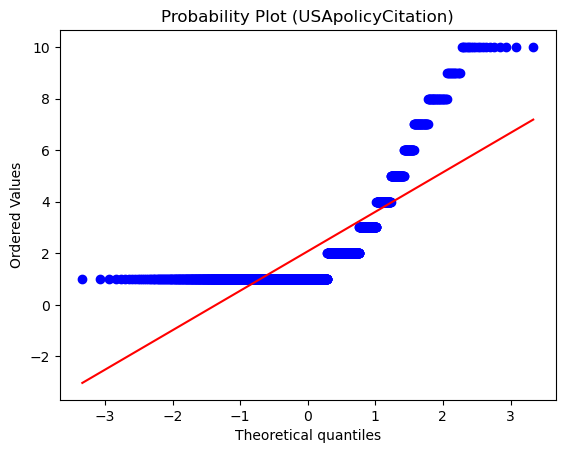

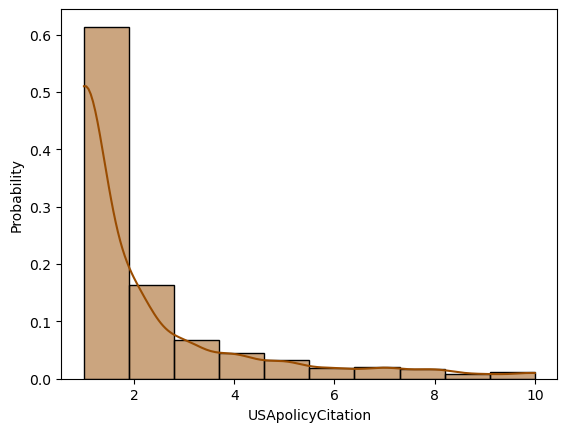

In [483]:
normalityTest('USApolicyCitation', merged_file3)
qqhistplot('USApolicyCitation', merged_file3)

In [403]:
print("mean: ", merged_file3.USApolicyCitation.mean())
print("variance: ",merged_file3.USApolicyCitation.var())
# mean< variance: overdispersion

mean:  2.0777709736680956
variance:  3.7494626754559133


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# from sklearn.decomposition import PCA

# from scipy.stats import spearmanr

In [ ]:
features_with_minmax_scaling = ['avg_syllables_per_word','n_long_words','lex_mtld','lex_rttr','lex_cttr','automated_readability_index','lex_yulek','flesch_reading_ease', 'mcalpine_eflaw',
                                'flesch_kincaid_grade','polysyllabcount','word_count','syllable_count','sentence_count','char_count','words_before_root','avg_word_length','average_sentence_length',
                                'lex_yulei','reading_time','n_difficult_words','lex_vocd','n_unique_words','lex_dugast','smog_index','gunning_fog','linsear_write_formula',
                                'letter_count','monosyllabcount','coleman_liau_index','dale_chall_readability_score']
len(features_with_minmax_scaling)

In [ ]:
scaler = MinMaxScaler()

In [836]:
scaled_merged_file3 = merged_file3.copy(deep = False)

In [837]:
scaled_merged_file3[features_with_minmax_scaling] = scaler.fit_transform(scaled_merged_file3[features_with_minmax_scaling])

In [ ]:
# scaled_merged_file3.info()
scaled_merged_file3['avg_word_length'].describe()

In [ ]:
# len(new_columns3)
# scaled_merged_file3.info()
len(scaled_merged_file3.columns)

## Classification

In [839]:
scaled_merged_file3_class = scaled_merged_file3.copy(deep = False)

In [840]:
scaled_merged_file3_class.loc[scaled_merged_file3_class['USApolicyCitation']>1, 'USApolicyCitation'] = 0
# df.loc[df["gender"] == "male", "gender"] = 1

In [842]:
scaled_merged_file3_class['USApolicyCitation'].value_counts()

1    1002
0     631
Name: USApolicyCitation, dtype: int64

In [859]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot



# get a list of models to evaluate
def get_models():
    models = dict()
    # # lr
    # rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    # model = DecisionTreeClassifier()
    # models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores_pre = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    scores_re = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return (scores_pre,scores_re)

# define dataset
X = scaled_merged_file3_class.drop(['USApolicyCitation'], axis = 1)
y = scaled_merged_file3_class['USApolicyCitation']
# X_train = sm.add_constant(X_train)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores_pre, scores_re = evaluate_model(model, X, y)
    
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores_pre), std(scores_pre)))
    print('>%s %.3f (%.3f)' % (name, mean(scores_re), std(scores_re)))
    
    f1_score = (2*mean(scores_pre)*mean(scores_re))/(mean(scores_pre)+mean(scores_re))
    
    print(f'{name}: {f1_score}')
    
    
    # results.append(f1_score)
# plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

>per 0.675 (0.018)
>per 0.658 (0.022)
per: 0.6664872869143118
>cart 0.664 (0.014)
>cart 0.654 (0.027)
cart: 0.6589370824741849
>rf 0.654 (0.016)
>rf 0.644 (0.026)
rf: 0.6491756005960523
>gbm 0.668 (0.018)
>gbm 0.661 (0.031)
gbm: 0.664349253106626


## dataset split

In [ ]:
print(len(merged_file3.columns))
sorted(list(merged_file3.columns))

In [795]:
df_train,df_test=train_test_split(scaled_merged_file3, train_size = 0.7,random_state =1) #new_frame
# X_train = train['mean_tfidf_sim'].values.reshape(-1, 1)
# y_train = train.USApolicyCitation
# X_train.shape,y_train.shape

In [797]:
print(len(df_train.columns))

62


In [798]:

#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
# expr = """USApolicyCitation ~ avg_n_long_words+avg_n_difficult_words+avg_adposition_count+pos_dissimilarity+syntactic_similarity+lex_mtld"""
# expr = """USApolicyCitation ~ avg_n_unique_words+char_count+letter_count+word_count+syllable_count+monosyllabcount+polysyllabcount+sentence_count+avg_word_length+average_sentence_length+avg_syllables_per_word+n_unique_words+n_long_words+n_difficult_words+avg_n_unique_words+avg_n_long_words+avg_n_difficult_words+avg_noun_count+avg_verb_count+avg_adverb_count+avg_adjective_count+avg_conjunction_count+avg_adposition_count+imp_pos_ratio+frequency_index+pos_dissimilarity+syntactic_similarity+words_before_root+lex_ttr+lex_rttr+lex_cttr+lex_maas+lex_msttr+lex_mattr+lex_hdd+lex_mtld+lex_vocd+lex_herdan+lex_summer+lex_dugast+lex_yulek+lex_yulei+lex_herdanvm+lex_simpsond+reading_time+smog_index+flesch_reading_ease+flesch_kincaid_grade+automated_readability_index+gunning_fog+coleman_liau_index+dale_chall_readability_score+linsear_write_formula+
#  mcalpine_eflaw+linsear_write_formula"""

# expr = """USApolicyCitation ~ avg_n_unique_words+char_count+letter_count+word_count+syllable_count+monosyllabcount+polysyllabcount+sentence_count+avg_word_length+average_sentence_length+avg_syllables_per_word+n_unique_words+n_long_words+n_difficult_words+avg_n_unique_words+avg_n_long_words+avg_n_difficult_words+avg_noun_count+avg_verb_count+avg_adverb_count+avg_adjective_count+avg_conjunction_count+avg_adposition_count+imp_pos_ratio+frequency_index+pos_dissimilarity+syntactic_similarity+words_before_root+lex_ttr+lex_rttr+lex_cttr+lex_maas+lex_msttr+lex_mattr+lex_hdd+lex_mtld+lex_vocd+lex_herdan+lex_summer+lex_dugast+lex_yulek+lex_yulei+lex_herdanvm+lex_simpsond+reading_time+smog_index+flesch_reading_ease+flesch_kincaid_grade+automated_readability_index+gunning_fog+coleman_liau_index+dale_chall_readability_score+linsear_write_formula+
  # mcalpine_eflaw+linsear_write_formula+mean_bert_base_uncased_sim+mean_bert_large_uncased_sim+mean_all_distilroberta_v1_sim+mean_all_mpnet_base_v2_sim+mean_all_MiniLM_L6_v2_sim+mean_sentence_t5_base_sim+ mean_tfidf_sim+
  # +mean_sentence_t5_xl_sim+mean_political_bert_sim+mean_specter_sim+mean_clinical_bert_sim+mean_legal_bert_sim+mean_scibert_sim+mean_biobert_large_cased_v11_squad_sim+mean_biobert_large_cased_sim+mean_biobert_v11_sim+mean_biobert_base_cased_v12_sim+mean_biobert_base_cased_v11_sim"""
#Set up the X and y matrices
# expr = """USApolicyCitation ~ avg_verb_count+linsear_write_formula+mean_specter_sim+syntactic_similarity+avg_adjective_count+avg_adposition_count+pos_dissimilarity+words_before_root
# +avg_conjunction_count+frequency_index+mean_tfidf_sim+avg_adverb_count"""


expr = """USApolicyCitation ~ automated_readability_index+
                             avg_n_unique_words+
                             avg_syllables_per_word+
                             avg_n_long_words+
                             avg_n_difficult_words+
                             avg_n_unique_words+
                             average_sentence_length+
                             avg_word_length+
                             
                             avg_noun_count+
                             avg_verb_count+
                             avg_adverb_count+
                             avg_adjective_count+
                             avg_conjunction_count+
                             avg_adposition_count+
                             
                             char_count+
                             coleman_liau_index+ 
                             
                             dale_chall_readability_score+
                             
                             flesch_reading_ease+
                             flesch_kincaid_grade+
                             frequency_index+  
                             
                             gunning_fog+
                             
                             imp_pos_ratio+
                             
                             lex_ttr+
                             lex_rttr+
                             lex_cttr+
                             lex_maas+
                             lex_msttr+
                             lex_mattr+
                             lex_hdd+
                             lex_mtld+
                             lex_vocd+
                             lex_herdan+
                             lex_summer+
                             lex_dugast+
                             lex_yulek+
                             lex_yulei+
                             lex_herdanvm+
                             lex_simpsond+
                             letter_count+
                             linsear_write_formula+
                             
                             mcalpine_eflaw+
                             mean_sentence_t5_base_sim+
                             mean_clinical_bert_sim+
                             mean_legal_bert_sim+
                             mean_biobert_large_cased_v11_squad_sim+
                             mean_biobert_large_cased_sim+
                             mean_biobert_v11_sim+
                             mean_biobert_base_cased_v12_sim+
                             mean_biobert_base_cased_v11_sim+
                             monosyllabcount+
                            
                             n_unique_words+
                             n_long_words+
                             n_difficult_words+
                            
                             polysyllabcount+
                             pos_dissimilarity+
                            
                             reading_time+
                             
                             sentence_count+
                             smog_index+
                             syntactic_similarity+
                             syllable_count+
                            
                             word_count+
                             words_before_root
                            
                
                              
                            """
#Set up the X and y matrices

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')


In [800]:
# len(df_train.columns)

In [598]:
# X_train = df_train.drop(['USApolicyCitation'], axis = 1)
# X_train = sm.add_constant(X_train)

# y_train = df_train['USApolicyCitation']

# X_test =  df_test.drop(['USApolicyCitation'], axis = 1)
# X_test = sm.add_constant(X_test)

# y_test = df_test['USApolicyCitation']

#### Dimensionality Reduction

In [440]:
# # Make an instance of the Model
# pca = PCA(.95)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)


In [762]:
# len(X_train.columns)

## Feature selection

In [723]:
merged_file3.columns

Index(['lex_herdanvm', 'avg_verb_count', 'avg_word_length', 'lex_hdd',
       'word_count', 'flesch_kincaid_grade', 'lex_rttr',
       'dale_chall_readability_score', 'lex_cttr', 'mcalpine_eflaw',
       'pos_dissimilarity', 'mean_legal_bert_sim', 'avg_conjunction_count',
       'avg_noun_count', 'frequency_index', 'n_long_words', 'avg_adverb_count',
       'automated_readability_index', 'lex_mtld', 'lex_maas',
       'avg_n_difficult_words', 'lex_yulek', 'flesch_reading_ease',
       'avg_syllables_per_word', 'lex_mattr', 'polysyllabcount',
       'syntactic_similarity', 'lex_msttr', 'mean_sentence_t5_base_sim',
       'mean_biobert_large_cased_v11_squad_sim', 'avg_adposition_count',
       'sentence_count', 'words_before_root', 'average_sentence_length',
       'char_count', 'lex_yulei', 'reading_time', 'mean_biobert_v11_sim',
       'n_difficult_words', 'lex_vocd', 'n_unique_words', 'lex_dugast',
       'imp_pos_ratio', 'smog_index', 'mean_biobert_base_cased_v12_sim',
       'gunnin

In [775]:
updated_new_columns3 = set(new_columns3) -{'USApolicyCitation'}
# print(len(new_columns3))
# len(updated_new_columns3)

####  Spearman's correlation

In [865]:
correlated_features = set()
correlation_matrix = scaled_merged_file3[updated_new_columns3].corr(method='spearman')

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            # print(colname,"\n",correlated_features)
correlation_matrix_cols = set(correlation_matrix.columns)
selected_features_spearmanr = list(correlation_matrix_cols-correlated_features)

print("Selected Features:")
print(selected_features_spearmanr,"\n\nTotal : ", len(selected_features_spearmanr))
print(correlated_features)

Selected Features:
['lex_herdanvm', 'avg_verb_count', 'avg_word_length', 'word_count', 'flesch_kincaid_grade', 'lex_rttr', 'mcalpine_eflaw', 'pos_dissimilarity', 'mean_legal_bert_sim', 'avg_conjunction_count', 'frequency_index', 'avg_noun_count', 'avg_adverb_count', 'lex_mtld', 'syntactic_similarity', 'mean_sentence_t5_base_sim', 'avg_adposition_count', 'linsear_write_formula', 'avg_adjective_count', 'words_before_root'] 

Total :  20
{'lex_hdd', 'dale_chall_readability_score', 'lex_cttr', 'automated_readability_index', 'n_long_words', 'lex_maas', 'avg_n_difficult_words', 'lex_yulek', 'flesch_reading_ease', 'avg_syllables_per_word', 'lex_mattr', 'polysyllabcount', 'lex_msttr', 'mean_biobert_large_cased_v11_squad_sim', 'sentence_count', 'average_sentence_length', 'char_count', 'lex_yulei', 'reading_time', 'mean_biobert_v11_sim', 'n_difficult_words', 'lex_vocd', 'n_unique_words', 'lex_dugast', 'imp_pos_ratio', 'smog_index', 'mean_biobert_base_cased_v12_sim', 'gunning_fog', 'mean_biobert_

In [863]:
# Calculate Spearman correlation matrix among predictors
# keep an eye on USApolicyCitation and successfulPolicyPercentage

correlation_matrix = scaled_merged_file3[updated_new_columns3].corr(method='spearman')

# Set the diagonal elements (correlation with self) to zero
np.fill_diagonal(correlation_matrix.values, 0)

# Set the threshold for correlation (choose as per requirement)
threshold = 0.7

# Identify highly correlated features
highly_correlated_features = set()
for col in correlation_matrix.columns:
    
#     print(col)
#     print(correlation_matrix[col].abs())
          
    correlated_cols = correlation_matrix.index[correlation_matrix[col].abs() >= threshold].tolist()
    highly_correlated_features.update(correlated_cols)
    
    # print(correlated_cols)
    # print(highly_correlated_features)
# print("Highly Correlated Features:")
# print(highly_correlated_features)
correlation_matrix_cols = set(correlation_matrix.columns)
selected_features_spearmanr = list(correlation_matrix_cols-highly_correlated_features)

print("Selected Features:")
print(selected_features,"\n\nTotal : ", len(selected_features_spearmanr))

Selected Features:
['lex_herdanvm', 'avg_verb_count', 'avg_word_length', 'word_count', 'flesch_kincaid_grade', 'lex_rttr', 'mcalpine_eflaw', 'pos_dissimilarity', 'mean_legal_bert_sim', 'avg_conjunction_count', 'frequency_index', 'avg_noun_count', 'avg_adverb_count', 'lex_mtld', 'syntactic_similarity', 'mean_sentence_t5_base_sim', 'avg_adposition_count', 'linsear_write_formula', 'avg_adjective_count', 'words_before_root'] 

Total :  11


In [ ]:
# Spearman's Correlation
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)


def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="spearman")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()    
    
display_corr_pairs(scaled_merged_file3[selected_features_spearmanr])

#### Recursive Feature Elimination (RFE)

In [803]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [807]:
scaled_merged_file3_rfe = scaled_merged_file3[selected_features_spearmanr+['USApolicyCitation']]

In [808]:
X = scaled_merged_file3_rfe.drop(['USApolicyCitation'], axis = 1)
y = scaled_merged_file3_rfe['USApolicyCitation']

In [814]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# pipeline.fit(X, y)
# # make a prediction for one example
# data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
# yhat = pipeline.predict(data)
# print('Predicted: %.3f' % (yhat))

MAE: -1.576 (0.103)


### lasso feature selection

In [546]:
# # Using Lasso for feature selection
# lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter to control the strength of regularization
# lasso_model.fit(X_train, y_train)
# print(lasso_model.coef_ )
# # Get selected features based on Lasso
# selected_features_lasso = merged_file3.columns[lasso_model.coef_ != 0]
# print("Selected Features with Lasso:")
# print(selected_features_lasso)

In [694]:
pipeline = Pipeline([
                     #('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
# print(coefficients)
importance = np.abs(coefficients)
selected_features_lasso = list(np.array(X_train.columns)[importance > 0])
selected_features_lasso

#test in case of dimension error:
# np.array(merged_file3.columns).shape
# importance.shape

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-3.374 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-3.939 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-4.229 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-4.025 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-4.192 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-3.374 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-3.939 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-4.229 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-4.025 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-4.192 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-3.374 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

[]

### Stepwise Forward Feature Selection

In [691]:
# !pip3 install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector


# Using Linear Regression as the base model for feature selection
model = LinearRegression()

# Performing forward feature selection
sfs = SequentialFeatureSelector(model,
                                k_features=10,  # Selecting 3 features (can be adjusted as needed)
                                forward=True,  # Forward selection
                                floating=False,
                                verbose=2,
                                scoring='neg_mean_squared_error',
                                cv=5)

# Fit the feature selector on the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the names of the selected features
selected_features_stepwise_forward = X_train.columns[list(selected_feature_indices)].to_list()
print("Selected Features with Stepwise Feature Selection (Forward Selection):")
print(selected_features_stepwise_forward)

# Fit the model with the selected features
model.fit(X_train[selected_features_stepwise_forward], y_train)

# Evaluate the model on the test set
predictions = model.predict(X_test[selected_features_stepwise_forward])
mse = np.mean((y_test - predictions) ** 2)
print("Mean Squared Error (MSE) on the test set:", mse)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    0.7s finished

[2023-07-27 20:31:05] Features: 1/10 -- score: -3.6445402256659243[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.7s finished

[2023-07-27 20:31:06] Features: 2/10 -- score: -3.5873671800872344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.6s finished

[2023-07-27 20:31:07] Features: 3/10 -- score: -3.5718933065724654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

Selected Features with Stepwise Feature Selection (Forward Selection):
['avg_n_long_words', 'avg_verb_count', 'avg_adverb_count', 'avg_adjective_count', 'dale_chall_readability_score', 'lex_yulek', 'monosyllabcount', 'n_unique_words', 'pos_dissimilarity', 'words_before_root']
Mean Squared Error (MSE) on the test set: USApolicyCitation    3.068111
dtype: float64


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.6s finished

[2023-07-27 20:31:11] Features: 10/10 -- score: -3.5294622414284538

### Stepwise Backward Feature Elimination

In [692]:
# !pip3 install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector


# Using Linear Regression as the base model for feature selection
model = LinearRegression()

# Performing forward feature selection
sfs = SequentialFeatureSelector(model,
                                k_features=10,  # Selecting 3 features (can be adjusted as needed)
                                forward=False,  # Forward selection
                                floating=False,
                                verbose=2,
                                scoring='neg_mean_squared_error',
                                cv=5)

# Fit the feature selector on the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the names of the selected features
selected_features_stepwise_backward = X_train.columns[list(selected_feature_indices)].to_list()
print("Selected Features with Stepwise Feature Selection (Backward Elimination):")
print(selected_features_stepwise_backward)

# Fit the model with the selected features
model.fit(X_train[selected_features_stepwise_backward], y_train)

# Evaluate the model on the test set
predictions = model.predict(X_test[selected_features_stepwise_backward])
mse = np.mean((y_test - predictions) ** 2)
print("Mean Squared Error (MSE) on the test set:", mse)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    1.0s finished

[2023-07-27 20:34:35] Features: 60/10 -- score: -3.6781588810376937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished

[2023-07-27 20:34:36] Features: 59/10 -- score: -3.6563120055565483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.1s finished

[2023-07-27 20:34:37] Features: 58/10 -- score: -3.638709282405179[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

Selected Features with Stepwise Feature Selection (Backward Elimination):
['automated_readability_index', 'avg_n_long_words', 'avg_verb_count', 'avg_adverb_count', 'avg_adjective_count', 'dale_chall_readability_score', 'lex_herdanvm', 'mean_clinical_bert_sim', 'mean_biobert_base_cased_v12_sim', 'pos_dissimilarity']
Mean Squared Error (MSE) on the test set: USApolicyCitation    3.087289
dtype: float64


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-07-27 20:35:01] Features: 10/10 -- score: -3.522039128779629

### Random Forest Feature selection

In [611]:
y_test.shape

(490, 1)

In [693]:
# from sklearn.ensemble import RandomForestRegressor

# Using Random Forest for feature selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# y_train = y_train.reshape(-1)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Set a threshold to select top N features (can be adjusted as needed)
top_n_features = 10
selected_features_rf = X_train.columns[sorted_indices[:top_n_features]].to_list()

print("Selected Features with Random Forest:")
print(selected_features_rf)

# # Fit the model with the selected features
# rf_model.fit(X_train[selected_features_rf], y_train)

# # Evaluate the model on the test set
# predictions = rf_model.predict(X_test[selected_features_rf])
# mse = np.mean((y_test - predictions) ** 2)
# print("Mean Squared Error (MSE) on the test set:", mse)


/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Selected Features with Random Forest:
['pos_dissimilarity', 'dale_chall_readability_score', 'avg_n_difficult_words', 'avg_noun_count', 'syntactic_similarity', 'linsear_write_formula', 'avg_n_long_words', 'frequency_index', 'avg_verb_count', 'words_before_root']


### Poisson and NB Regression

In [727]:
all_features = list(set(X_train.columns)-{'USApolicyCitation','Intercept'})

In [816]:
def regression(new_features:list):
    
    X1_train = X_train[['Intercept']+new_features]
    X1_test = X_test[['Intercept']+new_features]
    
    print(X1_train.columns)

    #Using the statsmodels GLM class, train the Poisson regression model on the training data set.
    poisson_training_results = sm.GLM(y_train, X1_train, family=sm.families.Poisson()).fit()

    #Print the training summary.
    print("poisson_training_results summary:\n",poisson_training_results.summary())

    print("poisson_training_results.mu:\n",poisson_training_results.mu)

    #Add the λ vector as a new column called 'BB_LAMBDA' to the Data Frame of the training data set
    df_train['BB_LAMBDA'] = poisson_training_results.mu

    #add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
    df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['USApolicyCitation'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

    #use patsy to form the model specification for the OLSR
    ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

    #Configure and fit the OLSR model
    aux_olsr_results = smf.ols(ols_expr, df_train).fit()

    #Print the regression params
    print(aux_olsr_results.params)

    #train the NB2 model on the training data set
    nb2_training_results = sm.GLM(y_train, X1_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

    #print the training summary
    print(nb2_training_results.summary())

    #make some predictions using our trained NB2 model
    nb2_predictions = nb2_training_results.get_prediction(X1_test)

    #print out the predictions
    predictions_summary_frame = nb2_predictions.summary_frame()
    print(predictions_summary_frame)

    #plot the predicted counts versus the actual counts for the test data
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test.values #['USApolicyCitation']
    fig = plt.figure()
    fig.suptitle('Predicted versus actual USA Policy Citation Counts')
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts', color ='red')
    plt.legend(handles=[predicted, actual])
    plt.show()
    # predicted, = plt.plot(actual_counts, predicted_counts, 'go-', label='Predicted counts')
    # # actual, = plt.plot(X_test, actual_counts, 'ro-', label='Actual counts', color ='blue')
    # #plt.legend(handles=[predicted, actual])
    # plt.show()

Index(['Intercept', 'lex_herdanvm', 'avg_verb_count', 'lex_hdd', 'word_count',
       'flesch_kincaid_grade', 'lex_rttr', 'dale_chall_readability_score',
       'lex_cttr', 'mcalpine_eflaw', 'pos_dissimilarity',
       'mean_legal_bert_sim', 'avg_conjunction_count', 'frequency_index',
       'avg_noun_count', 'automated_readability_index', 'avg_adverb_count',
       'n_long_words', 'lex_mtld', 'lex_maas', 'avg_n_difficult_words',
       'lex_yulek', 'flesch_reading_ease', 'avg_syllables_per_word',
       'lex_mattr', 'polysyllabcount', 'syntactic_similarity', 'lex_msttr',
       'mean_sentence_t5_base_sim', 'avg_adposition_count',
       'mean_biobert_large_cased_v11_squad_sim', 'sentence_count',
       'words_before_root', 'average_sentence_length', 'char_count',
       'lex_yulei', 'reading_time', 'mean_biobert_v11_sim',
       'n_difficult_words', 'lex_vocd', 'lex_dugast', 'n_unique_words',
       'imp_pos_ratio', 'smog_index', 'mean_biobert_base_cased_v12_sim',
       'gunning_fog'

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


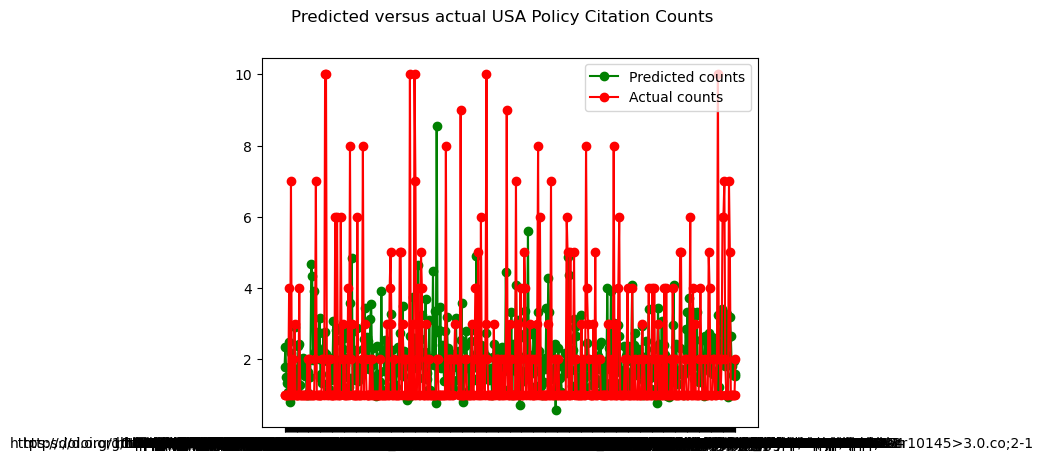

In [817]:
regression(all_features)

12
11
Index(['Intercept', 'avg_verb_count', 'avg_adjective_count',
       'avg_n_long_words', 'mean_clinical_bert_sim',
       'mean_biobert_base_cased_v12_sim', 'imp_pos_ratio', 'pos_dissimilarity',
       'lex_yulei', 'syntactic_similarity', 'avg_adverb_count',
       'avg_noun_count'],
      dtype='object')
poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1131
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.0
Date:                Fri, 28 Jul 2023   Deviance:                       1329.3
Time:                        13:47:07   Pearson chi2:                 1.73e+03
No. Iterations:      

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


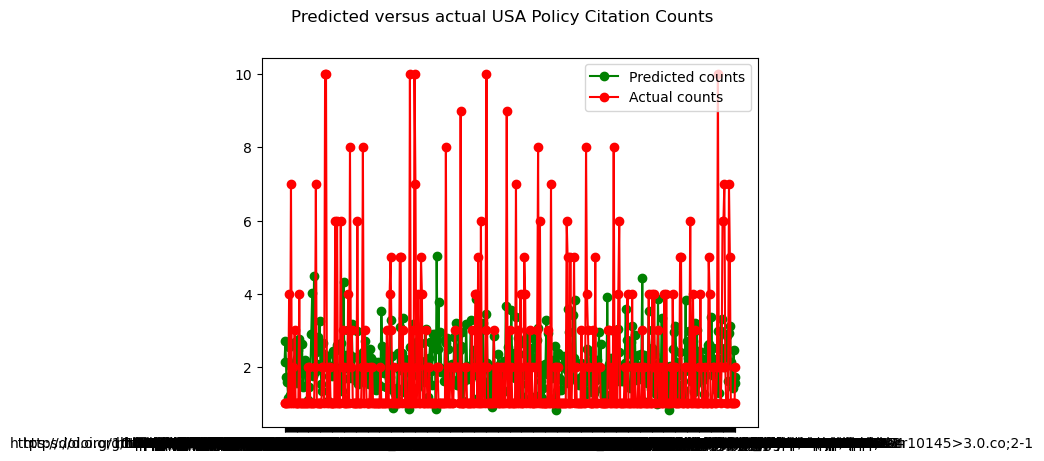

In [818]:
selected_significant_features =  ['avg_syllables_per_word','avg_n_long_words','avg_noun_count','avg_verb_count','avg_adjective_count','avg_adverb_count',
                                  'pos_dissimilarity','syntactic_similarity','lex_yulei','imp_pos_ratio',
                                  'mean_biobert_base_cased_v12_sim','mean_clinical_bert_sim']
print(len(selected_significant_features))

selected_significant_features = ['avg_verb_count','avg_adjective_count','avg_n_long_words','mean_clinical_bert_sim',
'mean_biobert_base_cased_v12_sim','imp_pos_ratio','pos_dissimilarity', 'lex_yulei','syntactic_similarity','avg_adverb_count','avg_noun_count']

print(len(selected_significant_features))


regression(selected_significant_features)

In [779]:
# selected_features_spearmanr
# X1_train.columns

Index(['Intercept', 'lex_herdanvm', 'avg_verb_count', 'avg_word_length',
       'word_count', 'flesch_kincaid_grade', 'lex_rttr', 'mcalpine_eflaw',
       'pos_dissimilarity', 'mean_legal_bert_sim', 'avg_conjunction_count',
       'frequency_index', 'avg_noun_count', 'avg_adverb_count', 'lex_mtld',
       'syntactic_similarity', 'mean_sentence_t5_base_sim',
       'avg_adposition_count', 'linsear_write_formula', 'avg_adjective_count',
       'words_before_root'],
      dtype='object')
poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1122
Model Family:                 Poisson   Df Model:                           20
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.1
D

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


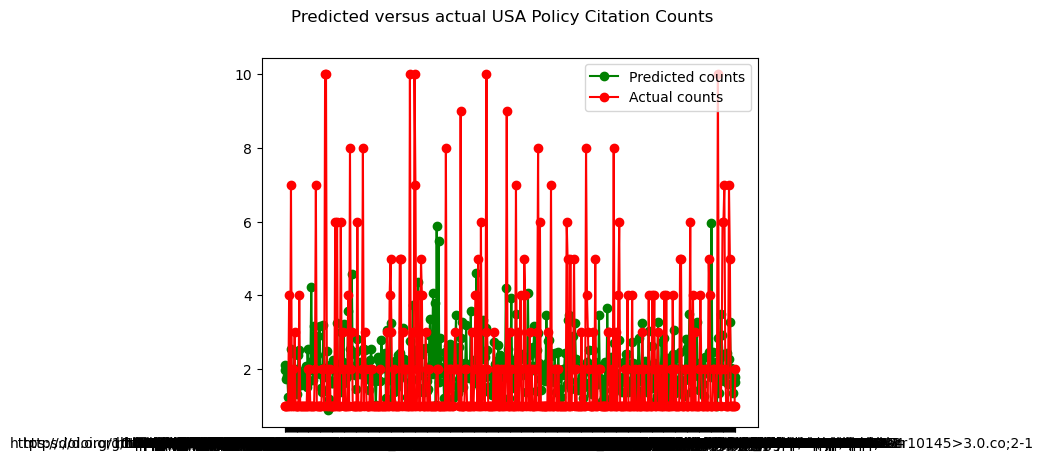

In [819]:
regression(selected_features_spearmanr)

In [622]:
# selected_features_lasso
len(X_train.columns)

61

Index(['Intercept'], dtype='object')
poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1142
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2165.7
Date:                Fri, 28 Jul 2023   Deviance:                       1552.8
Time:                        13:47:58   Pearson chi2:                 2.12e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


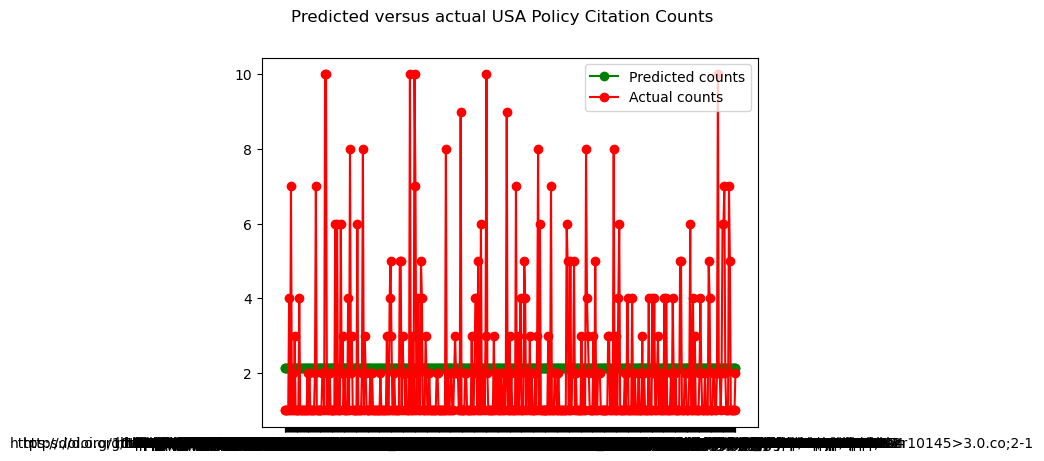

In [820]:
regression(selected_features_lasso)

Index(['Intercept', 'avg_n_long_words', 'avg_verb_count', 'avg_adverb_count',
       'avg_adjective_count', 'dale_chall_readability_score', 'lex_yulek',
       'monosyllabcount', 'n_unique_words', 'pos_dissimilarity',
       'words_before_root'],
      dtype='object')
poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1132
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.1
Date:                Fri, 28 Jul 2023   Deviance:                       1319.6
Time:                        13:48:12   Pearson chi2:                 1.72e+03
No. Iterations:                     5   Pseudo R-squ. (CS):     

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


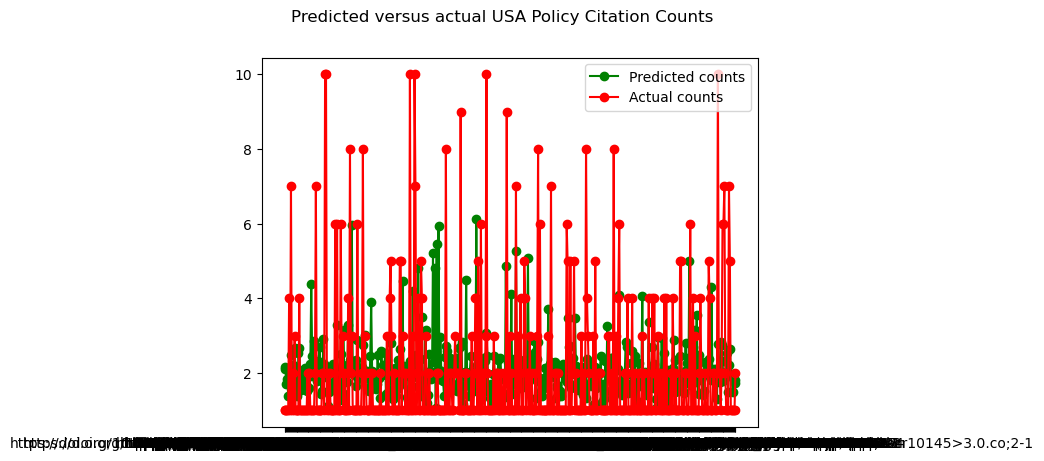

In [821]:
regression(selected_features_stepwise_forward)

Index(['Intercept', 'automated_readability_index', 'avg_n_long_words',
       'avg_verb_count', 'avg_adverb_count', 'avg_adjective_count',
       'dale_chall_readability_score', 'lex_herdanvm',
       'mean_clinical_bert_sim', 'mean_biobert_base_cased_v12_sim',
       'pos_dissimilarity'],
      dtype='object')
poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1132
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.3
Date:                Fri, 28 Jul 2023   Deviance:                       1307.9
Time:                        13:48:35   Pearson chi2:                 1.70e+03
No. Iterations:     

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


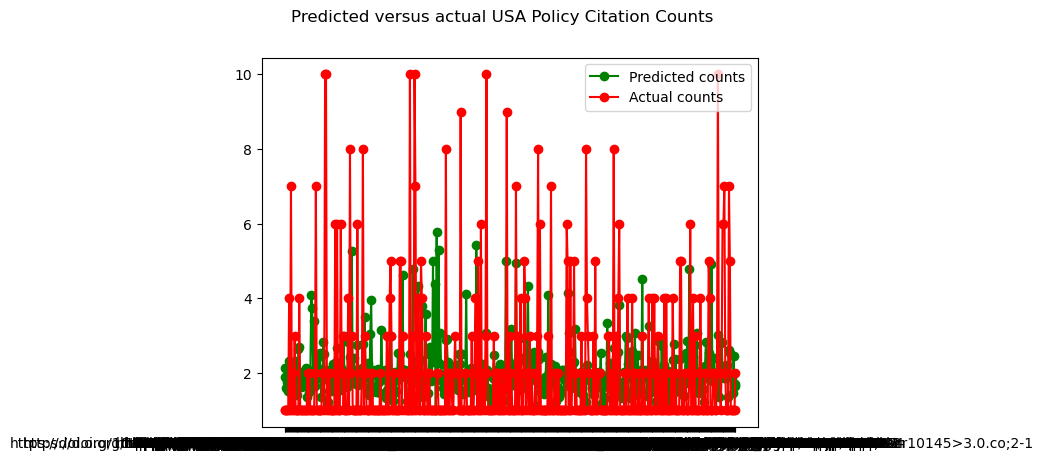

In [822]:
regression(selected_features_stepwise_backward)

Index(['Intercept', 'pos_dissimilarity', 'dale_chall_readability_score',
       'avg_n_difficult_words', 'avg_noun_count', 'syntactic_similarity',
       'linsear_write_formula', 'avg_n_long_words', 'frequency_index',
       'avg_verb_count', 'words_before_root'],
      dtype='object')
poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1132
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.9
Date:                Fri, 28 Jul 2023   Deviance:                       1327.2
Time:                        13:49:18   Pearson chi2:                 1.73e+03
No. Iterations:                     5   Pseudo

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


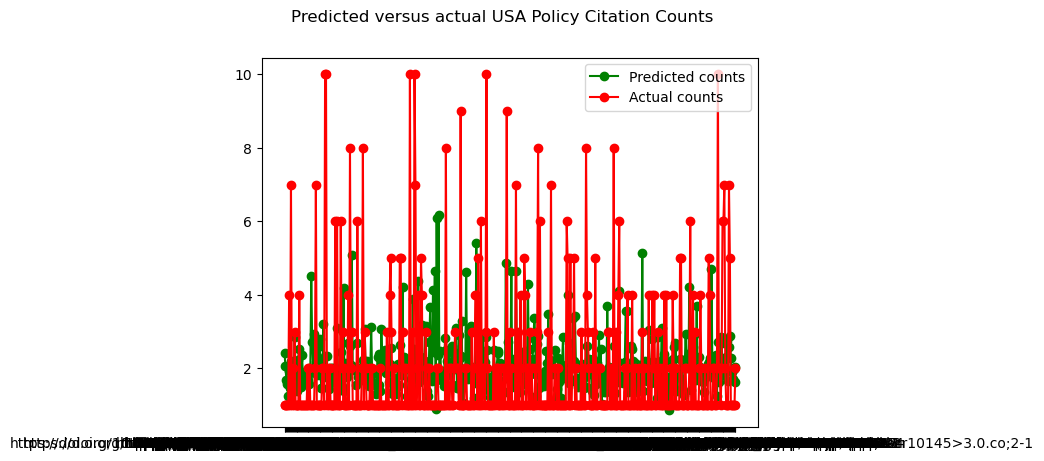

In [823]:
regression(selected_features_rf)


## Linear Regression models

In [824]:
def evaluation(X1_train, y1_train, y1_test, pred_test, model, model_name):
    
    print(f"\n{model_name} Regression Outputs:\n")
    print("Test_MSE: ",mean_squared_error(y1_test,pred_test))
    print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test))) 
    print("Test_R2: ",r2_score(y1_test, pred_test))
    
    return None

In [826]:
dataset = scaled_merged_file3
print(".....................................")
print("\nRegression outputs")
print(".....................................")
X= dataset.drop('USApolicyCitation', axis = 1)
# X = scaled_df[['avg_n_long_words','avg_n_difficult_words','avg_adposition_count','pos_dissimilarity','syntactic_similarity','lex_mtld']] #dataset.drop(['USApolicyCitation','tfidf_sim','url'], axis = 1) # Features
y = dataset['USApolicyCitation']  # Target
#     X_simScore = final_csv_file2[['char_count','word_count']].shape
#    # X_simScore = X_simScore.reshape(X_simScore.shape[1:])
#     y_citation = final_csv_file2['USApolicyCitation'].shape
    
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.3,train_size=0.7, random_state = 42)
print(X1_train.shape, y1_train.shape, X1_test.shape,y1_test.shape)
#X1_train = X1_train.values.reshape(-1, 1)
#X1_test = X1_test.values.reshape(-1, 1)
#print(X1_train.shape, y1_train.shape,X1_test.shape,y1_test.shape)   
    #linear
    
# X1_train = X_train
# X1_test = X_test
# y1_train =y_train
# y1_test = y_test
model_linear = LinearRegression()
model_linear.fit(X1_train, y1_train)
pred_test_linear= model_linear.predict(X1_test)
    
    # Visualising the Linear Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_linear, model_linear,'Linear')

# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,train_size=0.7, random_state = 42)
# model_linear = LinearRegression()
# model_linear.fit(X_train, y_train)
# poly_reg_y_predicted = model_linear.predict(X_test)

# evaluation(X_train,y_train,y_test, poly_reg_y_predicted, model_linear,'Polynomial')

    #ridge
model_ridge = Ridge(alpha=0.01)
model_ridge.fit(X1_train, y1_train) 
pred_test_ridge= model_ridge.predict(X1_test)
    
    # Visualising the Ridge Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_ridge, model_ridge,'Ridge')

    #lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X1_train, y1_train) 
pred_test_lasso= model_lasso.predict(X1_test)
    
    # Visualising the Lasso Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_lasso, model_lasso,'Lasso')

    #Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X1_train, y1_train) 
pred_test_enet= model_enet.predict(X1_test)
    
    # Visualising the Elastic Net Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_enet, model_enet,'Elastic net')
    
    # Initializing the Random Forest Regression model with 10 decision trees
model_randForest = RandomForestRegressor(n_estimators = 10, random_state = 0)
model_randForest.fit(X1_train, y1_train)
pred_test_randForest = model_randForest.predict(X1_test) # Predicting the target values of the test set

    # Visualising the Random Forest Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_randForest, model_randForest,'Random Forest')

.....................................

Regression outputs
.....................................
(1143, 61) (1143,) (490, 61) (490,)

Linear Regression Outputs:

Test_MSE:  4.037423404757206
Test_RMSE:  2.009334069973733
Test_R2:  0.10665936843880974

Ridge Regression Outputs:

Test_MSE:  4.047213703627393
Test_RMSE:  2.011768799744989
Test_R2:  0.10449311761518776

Lasso Regression Outputs:

Test_MSE:  4.227531744652937
Test_RMSE:  2.0560962391514988
Test_R2:  0.06459503992984217

Elastic net Regression Outputs:

Test_MSE:  4.222927935579845
Test_RMSE:  2.054976383217054
Test_R2:  0.06561370190621463

Random Forest Regression Outputs:

Test_MSE:  4.73530612244898
Test_RMSE:  2.176075854020025
Test_R2:  -0.047757675620482054


## Previous 

In [203]:
# [qqhistplot(column, merged_file2) for column in mean_sim_columns]

In [128]:
# final_csv_file2 = final_csv_file1[columns[0:2]+[columns[5]]+new_columns]

In [492]:
# merged_file3[new_cols].info()

In [663]:
#final_csv_file1.set_index('url', inplace=True)

In [666]:
# final_csv_file2
d = preprocessing.normalize(final_csv_file[new_columns], axis=0)
#print(d)
# normalized dataframe
scaled_df = pd.DataFrame(d, columns=new_columns)

In [665]:
# final_csv_file1.index

In [636]:
new_frame = pd.concat([final_csv_file1['USApolicyCitation'],scaled_df], axis =1)

In [637]:
new_frame

,USApolicyCitation,char_count,letter_count,word_count,syllable_count,monosyllabcount,polysyllabcount,sentence_count,avg_word_length,average_sentence_length,...,reading_time,smog_index,flesch_reading_ease,flesch_kincaid_grade,automated_readability_index,gunning_fog,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,mcalpine_eflaw
0,1,0.005596,0.005582,0.005886,0.005737,0.006106,0.005162,0.006640,0.020297,0.018987,...,0.005596,0.019559,0.020421,0.020386,0.018079,0.021354,0.019103,0.023495,0.008136,0.019200
1,3,0.004001,0.003993,0.004208,0.004097,0.004594,0.004298,0.004646,0.020297,0.019403,...,0.004001,0.020863,0.020297,0.020594,0.018280,0.020659,0.019103,0.022301,0.010848,0.019896
2,1,0.008149,0.008155,0.008457,0.008266,0.009167,0.008312,0.007542,0.020627,0.023977,...,0.008149,0.022167,0.018904,0.023298,0.022297,0.022891,0.020458,0.021688,0.012322,0.024075
3,6,0.010112,0.010092,0.010700,0.010187,0.011586,0.009371,0.011614,0.020174,0.019680,...,0.010112,0.019722,0.023727,0.018306,0.018280,0.019742,0.018800,0.020869,0.008118,0.020095
4,5,0.008174,0.008152,0.008419,0.008181,0.008877,0.008463,0.009810,0.020709,0.018294,...,0.008174,0.020211,0.020633,0.019970,0.018682,0.019444,0.019620,0.021722,0.012489,0.018504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,1,0.012537,0.012522,0.013235,0.012619,0.014477,0.011356,0.013609,0.020256,0.020789,...,0.012537,0.020048,0.023390,0.018930,0.019083,0.019940,0.018996,0.020460,0.015387,0.021389
2269,1,0.013383,0.013371,0.014708,0.013564,0.016126,0.011373,0.014128,0.019433,0.022314,...,0.013383,0.019722,0.022925,0.019970,0.018481,0.020783,0.017464,0.020460,0.011990,0.022781
2270,1,0.007616,0.007596,0.007637,0.007875,0.007686,0.008526,0.009154,0.021286,0.017879,...,0.007616,0.020863,0.017240,0.022258,0.019485,0.021602,0.021064,0.023802,0.027643,0.018205
2271,1,0.006449,0.006464,0.006589,0.006490,0.006794,0.006203,0.005137,0.020997,0.027441,...,0.006449,0.022982,0.017847,0.025378,0.025511,0.026909,0.021919,0.023631,0.028308,0.027258


In [638]:
print("mean: ", new_frame.USApolicyCitation.mean())
print("variance: ",new_frame.USApolicyCitation.var())
# mean< variance: overdispersion

mean:  2.8209414870215572
variance:  5.785265486451363


In [275]:
merged_file4 = merged_file3[['USApolicyCitation']+features]

In [293]:
new_cols

['USApolicyCitation',
 'successfulPolicyPercentage',
 'avg_verb_count',
 'linsear_write_formula',
 'mean_specter_sim',
 'syntactic_similarity',
 'avg_adjective_count',
 'avg_adposition_count',
 'pos_dissimilarity',
 'words_before_root',
 'avg_conjunction_count',
 'frequency_index',
 'mean_tfidf_sim',
 'avg_adverb_count']

In [592]:
#type(merged_file3.columns)
len(set(new_columns3)-{'successfulPolicyPercentage'})

62

In [545]:
# from sklearn.datasets import load_diabetes
# X,y = load_diabetes(return_X_y=True)
# features = load_diabetes()['feature_names']
# # 

In [815]:
# merged_file3
# features


In [305]:
features=['avg_n_unique_words','char_count','letter_count','word_count','syllable_count','monosyllabcount','polysyllabcount','sentence_count','avg_word_length','average_sentence_length',
          'avg_syllables_per_word','n_unique_words','n_long_words','n_difficult_words','avg_n_unique_words','avg_n_long_words','avg_n_difficult_words','avg_noun_count',
          'avg_verb_count','avg_adverb_count','avg_adjective_count','avg_conjunction_count','avg_adposition_count','imp_pos_ratio','frequency_index','pos_dissimilarity',
          'syntactic_similarity','words_before_root','lex_ttr','lex_rttr','lex_cttr','lex_maas','lex_msttr','lex_mattr','lex_hdd','lex_mtld','lex_vocd','lex_herdan','lex_summer',
          'lex_dugast','lex_yulek','lex_yulei','lex_herdanvm','lex_simpsond','reading_time','smog_index','flesch_reading_ease','flesch_kincaid_grade','automated_readability_index',
          'gunning_fog','coleman_liau_index','dale_chall_readability_score','linsear_write_formula','mcalpine_eflaw','linsear_write_formula','mean_bert_base_uncased_sim',
          'mean_bert_large_uncased_sim','mean_all_distilroberta_v1_sim','mean_all_mpnet_base_v2_sim','mean_all_MiniLM_L6_v2_sim','mean_sentence_t5_base_sim','mean_tfidf_sim',
  'mean_sentence_t5_xl_sim','mean_political_bert_sim','mean_specter_sim','mean_clinical_bert_sim','mean_legal_bert_sim','mean_scibert_sim','mean_biobert_large_cased_v11_squad_sim',
          'mean_biobert_large_cased_sim','mean_biobert_v11_sim','mean_biobert_base_cased_v12_sim','mean_biobert_base_cased_v11_sim']

### Feature Selection using wrapper method: Statistical SigniFicance P-Value

### Stepwise Forward Feature Selection

### Stepwise Backward Feature Elimination

### Feature selection with regularization (Lasso/ L1 regularization)

### Feature Selection using Random Forest 

In [329]:
# lasso_model=Lasso(alpha=0.1)
# lasso_model.fit(X_train,y_train)
# pred_test = lasso_model.predict(X_test)
# # mse = np.mean((y_test-predictions)**2)
# print("Test_MSE: ",mean_squared_error(y_test,pred_test))
# print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test))) 
# print("Test_R2: ",r2_score(y_test, pred_test))

### Poisson and NB Regression after PCA

poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1143
Model:                            GLM   Df Residuals:                     1134
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2044.7
Date:                Wed, 26 Jul 2023   Deviance:                       1310.7
Time:                        05:23:25   Pearson chi2:                 1.70e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1908
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

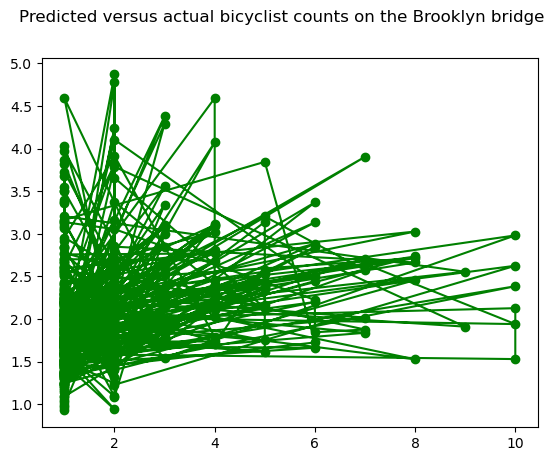

In [264]:
X_train = X_train[new_features]
X_test = X_test[new_features]

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print("poisson_training_results summary:\n",poisson_training_results.summary())

print("poisson_training_results.mu:\n",poisson_training_results.mu)

#Add the λ vector as a new column called 'BB_LAMBDA' to the Data Frame of the training data set
df_train['BB_LAMBDA'] = poisson_training_results.mu

#add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['USApolicyCitation'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

#use patsy to form the model specification for the OLSR
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

#Configure and fit the OLSR model
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

#Print the regression params
print(aux_olsr_results.params)

#train the NB2 model on the training data set
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

#print the training summary
print(nb2_training_results.summary())

#make some predictions using our trained NB2 model
nb2_predictions = nb2_training_results.get_prediction(X_test)

#print out the predictions
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

#plot the predicted counts versus the actual counts for the test data
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['USApolicyCitation']
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(actual_counts, predicted_counts, 'go-', label='Predicted counts')
# actual, = plt.plot(X_test, actual_counts, 'ro-', label='Actual counts', color ='blue')
#plt.legend(handles=[predicted, actual])
plt.show()

array([[-1.17655299e-02, -1.16243349e-02, -9.05244848e-03,
         1.64708113e-03,  1.21461231e-02,  5.32102141e-03],
       [-2.00746960e-02, -6.11071692e-03, -1.13975009e-02,
         5.38828080e-03,  9.83349681e-03, -6.20747823e-03],
       [ 5.06192676e-05, -1.38635306e-02,  2.09204171e-02,
         4.56366557e-03,  4.24824911e-03, -4.74760222e-03],
       ...,
       [ 1.68328520e-02, -1.41380083e-02, -1.19952507e-02,
        -1.67055620e-03,  4.47162667e-04, -1.38827029e-03],
       [-2.62142016e-02,  2.30005269e-04,  3.89195496e-03,
         7.05660089e-03,  1.60291688e-03, -1.36036591e-04],
       [-2.54049030e-03, -1.90558740e-02, -5.04872066e-03,
         1.11402993e-02,  9.47436596e-03,  1.36465491e-04]])

### Poisson and NB Regression 

poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1591
Model:                            GLM   Df Residuals:                     1537
Model Family:                 Poisson   Df Model:                           53
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3281.1
Date:                Mon, 17 Jul 2023   Deviance:                       2314.8
Time:                        03:34:34   Pearson chi2:                 2.67e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2430
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


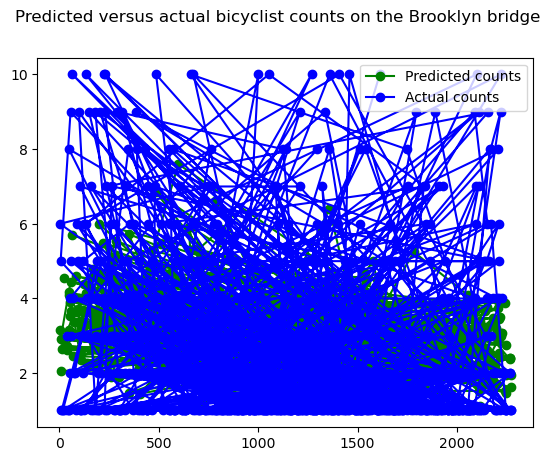

In [687]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
# expr = """USApolicyCitation ~ avg_n_long_words+avg_n_difficult_words+avg_adposition_count+pos_dissimilarity+syntactic_similarity+lex_mtld"""
expr = """USApolicyCitation ~ avg_n_unique_words+char_count+letter_count+word_count+syllable_count+monosyllabcount+polysyllabcount+sentence_count+avg_word_length+average_sentence_length+avg_syllables_per_word+n_unique_words+n_long_words+n_difficult_words+avg_n_unique_words+avg_n_long_words+avg_n_difficult_words+avg_noun_count+avg_verb_count+avg_adverb_count+avg_adjective_count+avg_conjunction_count+avg_adposition_count+imp_pos_ratio+frequency_index+pos_dissimilarity+syntactic_similarity+words_before_root+lex_ttr+lex_rttr+lex_cttr+lex_maas+lex_msttr+lex_mattr+lex_hdd+lex_mtld+lex_vocd+lex_herdan+lex_summer+lex_dugast+lex_yulek+lex_yulei+lex_herdanvm+lex_simpsond+reading_time+smog_index+flesch_reading_ease+flesch_kincaid_grade+automated_readability_index+gunning_fog+coleman_liau_index+dale_chall_readability_score+linsear_write_formula+
 mcalpine_eflaw+linsear_write_formula"""

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print("poisson_training_results summary:\n",poisson_training_results.summary())

print("poisson_training_results.mu:\n",poisson_training_results.mu)

#Add the λ vector as a new column called 'BB_LAMBDA' to the Data Frame of the training data set
df_train['BB_LAMBDA'] = poisson_training_results.mu

#add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['USApolicyCitation'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

#use patsy to form the model specification for the OLSR
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

#Configure and fit the OLSR model
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

#Print the regression params
print(aux_olsr_results.params)

#train the NB2 model on the training data set
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

#print the training summary
print(nb2_training_results.summary())

#make some predictions using our trained NB2 model
nb2_predictions = nb2_training_results.get_prediction(X_test)

#print out the predictions
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

#plot the predicted counts versus the actual counts for the test data
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['USApolicyCitation']
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts', color ='blue')
plt.legend(handles=[predicted, actual])
plt.show()

poisson_training_results summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:      USApolicyCitation   No. Observations:                 1818
Model:                            GLM   Df Residuals:                     1764
Model Family:                 Poisson   Df Model:                           53
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3754.2
Date:                Fri, 14 Jul 2023   Deviance:                       2661.2
Time:                        22:03:59   Pearson chi2:                 3.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2375
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

<Figure size 640x480 with 0 Axes>

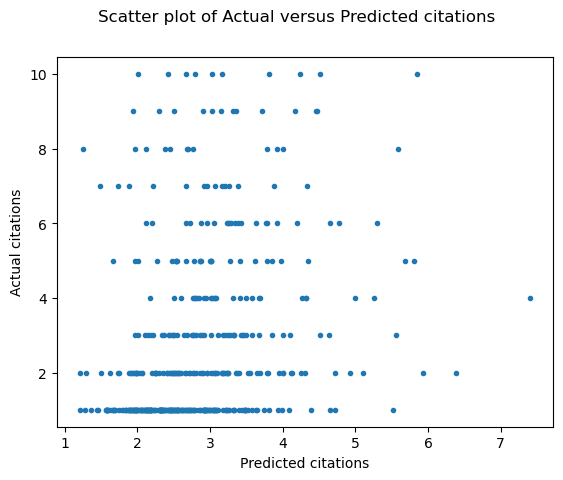

In [644]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """USApolicyCitation ~ avg_n_unique_words+char_count+letter_count+word_count+syllable_count+monosyllabcount+polysyllabcount+sentence_count+avg_word_length+average_sentence_length+avg_syllables_per_word+n_unique_words+n_long_words+n_difficult_words+avg_n_unique_words+avg_n_long_words+avg_n_difficult_words+avg_noun_count+avg_verb_count+avg_adverb_count+avg_adjective_count+avg_conjunction_count+avg_adposition_count+imp_pos_ratio+frequency_index+pos_dissimilarity+syntactic_similarity+words_before_root+lex_ttr+lex_rttr+lex_cttr+lex_maas+lex_msttr+lex_mattr+lex_hdd+lex_mtld+lex_vocd+lex_herdan+lex_summer+lex_dugast+lex_yulek+lex_yulei+lex_herdanvm+lex_simpsond+reading_time+smog_index+flesch_reading_ease+flesch_kincaid_grade+automated_readability_index+gunning_fog+coleman_liau_index+dale_chall_readability_score+linsear_write_formula+
 mcalpine_eflaw+linsear_write_formula"""

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print("poisson_training_results summary:\n",poisson_training_results.summary())

print("poisson_training_results.mu:\n",poisson_training_results.mu)

#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print("predictions_summary_frame: \n",predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['USApolicyCitation']

print(predicted_counts)
print(actual_counts)

#Mlot the predicted counts versus the actual counts for the test data.
# fig = plt.figure()
# fig.suptitle('Predicted versus actual policy citations')
# predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
# actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual citations')
# plt.legend(handles=[predicted, actual])
# plt.show()

#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted citations')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted citations')
plt.ylabel('Actual citations')
plt.show()

In [619]:
# columns[0:2]+[columns[5]]+new_columns
# final_csv_file2.info()
# print(scaled_df.head())

In [587]:
#regression_models =defaultdict()
# regression_models = ['Linear Regression','Ridge','Lasso','ElasticNet', 'Random Forest']

In [693]:
def evaluation(X1_train, y1_train, y1_test, pred_test, model, model_name):
    
    print(f"\n{model_name} Regression Outputs:\n")
    print("Test_MSE: ",mean_squared_error(y1_test,pred_test))
    print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test))) 
    print("Test_R2: ",r2_score(y1_test, pred_test))
    
    return None

In [677]:
new_frame.drop

Index(['USApolicyCitation', 'char_count', 'letter_count', 'word_count',
       'syllable_count', 'monosyllabcount', 'polysyllabcount',
       'sentence_count', 'avg_word_length', 'average_sentence_length',
       'avg_syllables_per_word', 'n_unique_words', 'n_long_words',
       'n_difficult_words', 'avg_n_unique_words', 'avg_n_long_words',
       'avg_n_difficult_words', 'avg_noun_count', 'avg_verb_count',
       'avg_adverb_count', 'avg_adjective_count', 'avg_conjunction_count',
       'avg_adposition_count', 'imp_pos_ratio', 'frequency_index',
       'pos_dissimilarity', 'syntactic_similarity', 'words_before_root',
       'lex_ttr', 'lex_rttr', 'lex_cttr', 'lex_maas', 'lex_msttr', 'lex_mattr',
       'lex_hdd', 'lex_mtld', 'lex_vocd', 'lex_herdan', 'lex_summer',
       'lex_dugast', 'lex_yulek', 'lex_yulei', 'lex_herdanvm', 'lex_simpsond',
       'reading_time', 'smog_index', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'automated_readability_index', 'gunning_fog',
       '

In [694]:
dataset = final_csv_file2
print(".....................................")
print("\nRegression outputs")
print(".....................................")
X= new_frame.drop('USApolicyCitation', axis = 1)
# X = scaled_df[['avg_n_long_words','avg_n_difficult_words','avg_adposition_count','pos_dissimilarity','syntactic_similarity','lex_mtld']] #dataset.drop(['USApolicyCitation','tfidf_sim','url'], axis = 1) # Features
y = new_frame['USApolicyCitation']  # Target
#     X_simScore = final_csv_file2[['char_count','word_count']].shape
#    # X_simScore = X_simScore.reshape(X_simScore.shape[1:])
#     y_citation = final_csv_file2['USApolicyCitation'].shape
    
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.3,train_size=0.7, random_state = 42)
print(X1_train.shape, y1_train.shape, X1_test.shape,y1_test.shape)
#X1_train = X1_train.values.reshape(-1, 1)
#X1_test = X1_test.values.reshape(-1, 1)
#print(X1_train.shape, y1_train.shape,X1_test.shape,y1_test.shape)   
    #linear
    
X1_train = X_train
X1_test = X_test
y1_train =y_train
y1_test = y_test
model_linear = LinearRegression()
model_linear.fit(X1_train, y1_train)
pred_test_linear= model_linear.predict(X1_test)
    
    # Visualising the Linear Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_linear, model_linear,'Linear')

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,train_size=0.7, random_state = 42)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
poly_reg_y_predicted = model_linear.predict(X_test)

evaluation(X_train,y_train,y_test, poly_reg_y_predicted, model_linear,'Polynomial')

    #ridge
model_ridge = Ridge(alpha=0.01)
model_ridge.fit(X1_train, y1_train) 
pred_test_ridge= model_ridge.predict(X1_test)
    
    # Visualising the Ridge Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_ridge, model_ridge,'Ridge')

    #lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X1_train, y1_train) 
pred_test_lasso= model_lasso.predict(X1_test)
    
    # Visualising the Lasso Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_lasso, model_lasso,'Lasso')

    #Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X1_train, y1_train) 
pred_test_enet= model_enet.predict(X1_test)
    
    # Visualising the Elastic Net Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_enet, model_enet,'Elastic net')
    
    # Initializing the Random Forest Regression model with 10 decision trees
model_randForest = RandomForestRegressor(n_estimators = 10, random_state = 0)
model_randForest.fit(X1_train, y1_train)
pred_test_randForest = model_randForest.predict(X1_test) # Predicting the target values of the test set

    # Visualising the Random Forest Regression results
evaluation(X1_train,y1_train,y1_test, pred_test_randForest, model_randForest,'Random Forest')

.....................................

Regression outputs
.....................................
(1591, 53) (1591,) (682, 53) (682,)

Linear Regression Outputs:

Test_MSE:  5.739330687167024
Test_RMSE:  2.3956900231805918
Test_R2:  0.01292553494550841

Polynomial Regression Outputs:

Test_MSE:  360357275354.5599
Test_RMSE:  600297.6556297384
Test_R2:  -61230178589.62572

Ridge Regression Outputs:

Test_MSE:  5.7326294565999385
Test_RMSE:  2.3942910133481976
Test_R2:  0.014078041036855171

Lasso Regression Outputs:

Test_MSE:  5.805111417661065
Test_RMSE:  2.4093798823890484
Test_R2:  0.0016122855611366838

Elastic net Regression Outputs:

Test_MSE:  5.790671582330407
Test_RMSE:  2.4063814291027112
Test_R2:  0.004095709763605737

Random Forest Regression Outputs:

Test_MSE:  6.532683284457479
Test_RMSE:  2.5559114390873328
Test_R2:  -0.12351861390290209


/home/psych256lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [543]:
df = final_csv_file2 #= pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]
test.shape

(446, 55)

In [423]:
final_csv_file.reset_index(inplace= True)

In [426]:
final_csv_file1 = pd.merge(org_file,final_csv_file, on ='url')#

In [153]:
# instantiate new text object (use the tokenizer=blobber argument to use the textblob tokenizer)
lex = LexicalRichness(output1)

# Return word count.
print("lex.words ",lex.words)
#57

# Return (unique) word count.
print('lex.terms ', lex.terms)
#39

# Return type-token ratio (TTR) of text.
print('lex.ttr ',lex.ttr)
0.6842105263157895

# Return root type-token ratio (RTTR) of text.
print('lex.rttr ',lex.rttr)
# 5.165676192553671

# Return corrected type-token ratio (CTTR) of text.
print('lex.cttr ',lex.cttr)
# 3.6526846651686067

# Return mean segmental type-token ratio (MSTTR).
print('msttr ',lex.msttr(segment_window=25))
# 0.88

# Return moving average type-token ratio (MATTR).
print('mattr ',lex.mattr(window_size=25))
# 0.8351515151515151

# Return Measure of Textual Lexical Diversity (MTLD).
print('mtld ',lex.mtld(threshold=0.72))
# 46.79226361031519

# Return hypergeometric distribution diversity (HD-D) measure.
print('hdd',lex.hdd(draws=42))
# 0.7468703323966486

# Return voc-D measure.
print('vocd ',lex.vocd(ntokens=50, within_sample=100, iterations=3))
# 46.27679899103406

# Return Herdan's lexical diversity measure.
print('lex.Herdan ',lex.Herdan)
0.9061378160786574

# Return Summer's lexical diversity measure.
print('lex.Summer ',lex.Summer)
# 0.9294460323356605

# Return Dugast's lexical diversity measure.
print('lex.Dugast ',lex.Dugast)
# 43.074336212149774

# Return Maas's lexical diversity measure.
print('lex.Maas ',lex.Maas)
# 0.023215679867353005

# Return Yule's K.
print('lex.yulek ',lex.yulek)
# 153.8935056940597

# Return Yule's I.
print('lex.yulei ',lex.yulei)
#22.36764705882353

# Return Herdan's Vm.
print('herdanvm ',lex.herdanvm)
#0.08539428890448784

# Return Simpson's D.
print('simpsond ',lex.simpsond)
#0.015664160401002505

flt = ld.flemmatize(output1)
print("no of tokens: ",len(ld.tokenize(output)))
print("ttr: ",ld.ttr(flt))
print("root_ttr: ",ld.root_ttr(flt))
print("log_ttr: ",ld.log_ttr(flt))
print("maas_ttr: ",ld.maas_ttr(flt))
print("mtld: ", ld.mtld(flt))
print("hdd: ", ld.hdd(flt))
print("msttr: ", ld.msttr(flt,window_length=25))
print("mattr: ", ld.mattr(flt,window_length=25))
print("mtld_ma_wrap: ",ld.mtld_ma_wrap(flt))
print("mtld_ma_bid: ",ld.mtld_ma_bid(flt))

lex.words  3996
lex.terms  713
lex.ttr  0.17842842842842843
lex.rttr  11.27916084952553
lex.cttr  7.975571122793323
msttr  0.8349685534591196
mattr  0.8317824773414262
mtld  45.06425768476128
hdd 0.805557649291222
vocd  69.38291466661867
lex.Herdan  0.7921671884121655
lex.Summer  0.8898643933230622
lex.Dugast  39.902501806186784
lex.Maas  0.025061085263705256
lex.yulek  143.07851394938484
lex.yulei  2.1936000276158465
herdanvm  0.1146977641500008
simpsond  0.014311432834586777
no of tokens:  5571
ttr:  0.16841841841841843
root_ttr:  10.646388852357198
log_ttr:  0.785205202561545
maas_ttr:  0.05963829350325924
mtld:  43.33368098081648
hdd:  0.7910303213855219
msttr:  0.8236477987421386
mattr:  0.8211379657603585
mtld_ma_wrap:  45.859609609609606
mtld_ma_bid:  45.469176351692774


In [16]:
def text_preprocessing(text: str)->str:
    """Cleaning the pdf texts.
    """
    preprocess_functions = [ remove_email, remove_url, remove_number, remove_special_character, remove_itemized_bullet_and_numbering, normalize_unicode, remove_whitespace]
    preprocessed_text = preprocess_text(text, preprocess_functions)
    preprocessed_text1=preprocess_text(preprocessed_text, [remove_name]) 
    
    sentence_list = nltk.sent_tokenize(preprocessed_text1)
    #cleaned_sentence_list=[sentence.translate(str.maketrans('','',string.punctuation)).strip() for sentence in sentence_list] # remove punctuations and leading or trailing zeros from each sentence in the list
    print(preprocessed_text1)
    return preprocessed_text1 #cleaned_sentence_list 

In [17]:
#Extract text from Pdf using pyMuPDF
def extract_pdf_text(file_path: str)-> str:
    text = " "
    try:
        with fitz.open(file_path) as doc: # open a supported document
            text = ' '.join([page.get_text() for page in doc])
    except Exception as e:
        text = "Failed to open file"
        return text
    else:
        return text

In [18]:
def find_file(file_title: str)->str:
    file_path=""
    folder="articles"
    path="/home/psych256lab/Documents/Mokarrama/Thesis/Data/" 
    file_path=path+folder+"/"+file_title
        
    return file_path

In [19]:
def pdfProcessing(index: str):
    
    pdf_title = filterd_articlePolicyList2.at[index,'articlePdf']
    file_path = find_file(pdf_title)  # get file path
    pdf_text = extract_pdf_text(file_path)      # extract text 
    #print(pdf_text)          
    if (pdf_text!="Failed to open file"):
        sentence_list = text_preprocessing(pdf_text)  #  do preprocessing
       # non_empty_sentence_list = [sentence for sentence in sentence_list if sentence!=''] 
        
        #article_sentences[index] = non_empty_sentence_list 

        return sentence_list 
    else:
        return pdf_text
    


In [20]:
#for index in df:
# def documentProcessing(index:str):
#     # For Articles
#     pdfProcessing(index, -1, '', file_type = 'article')
#     # For Policy 
#     # policy_urls= filterd_articlePolicyList2.at[index,'successful_policyList']
#     # [pdfProcessing(index, policy_index, policy_url, file_type = 'policy') for policy_index, policy_url in enumerate(policy_urls)]
              
#     return None

In [24]:
filterd_articlePolicyList2.at[article,'articlePdf']

'52275_cannabis use during methadone maintenance treatment for opioid use disorder a systematic review and metaanalysis.pdf'

In [ ]:
article="https://doi.org/10.9778/cmajo.20190026"
output = pdfProcessing(article)


In [ ]:
docProcess = [documentProcessing(article) for article in article_list] # if article_list.index(article)>1701]

# New section

In [190]:
#[[word for word in doc if word in vocab] for doc in doc1]
            
    #print("sent: ",x,"\n")

In [145]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])
doc = nlp(output1)

#print("clause_count: ", surface_proxies.clause_count(doc, model.infinitive_map))
#print("char_count: ", surface_proxies.char_count(doc))
print("syllable_count: ", surface_proxies.syllable_count(doc))
print("word_count: ", surface_proxies.word_count(doc))

print("sentence_count: ", surface_proxies.sentence_count(doc))
print("syllable_word_ratio: ", surface_proxies.syllable_word_ratio(doc))
print("average_word_length: ", surface_proxies.average_word_length(doc))
print("average_sentence_length: ", surface_proxies.average_sentence_length(doc))
pos_dist = surface_proxies.pos_distribution(doc)
#print("pos_distribution: ", pos_dist)
print("noun_count: ", surface_proxies.noun_count(doc))
print("adjective_count: ", pos_dist['ADJ'])
print("verb_count: ", pos_dist['VERB'])
print("adverb_count: ", pos_dist['ADV'])
print("Adposition_count: ", pos_dist['ADP'])
print("CONJunction_count: ", pos_dist['CCONJ']+pos_dist['SCONJ'])

print("noun_phrase_density: ", surface_proxies.noun_phrase_density(doc))
print("freq_index: ", surface_proxies.frequency_index(doc, model.crea_frequency))
print("syntactic_similarity: ", surface_proxies.syntactic_similarity(doc))
print("words_before_root: ", surface_proxies.words_before_root(doc,max_depth=4))
print("pos_dissimilarity: ",surface_proxies.pos_dissimilarity(doc))

#print("lexical_density: ",surface_proxies.lexical_density(doc))

filterd_articlePolicyList2.at[index,'word_variation_index'] =  TRUNAJOD.ttr.word_variation_index(doc1) 
   
#     filterd_articlePolicyList2.at[index,'ttr_d_estimate'] =  TRUNAJOD.ttr.d_estimate(doc1, min_range = 35, max_range = 50, trials = 5) 
#     filterd_articlePolicyList2.at[index,'ttr_yule_k'] =  TRUNAJOD.ttr.yule_k(doc1)
'''

syllable_count:               6914
lexicon_count:                3996
sentence_count:               279
char_count:                   21743
letter_count:                 21464
polysyllabcount:              899
monosyllabcount:              2374'''


syllable_count:  9114
word_count:  4004
sentence_count:  269
syllable_word_ratio:  2.2762237762237763
average_word_length:  5.363136863136863
average_sentence_length:  14.884758364312267
noun_count:  1591
adjective_count:  484
verb_count:  299
adverb_count:  81
Adposition_count:  658
CONJunction_count:  222
noun_phrase_density:  1.1395348837209303
freq_index:  -1.46817992037174
syntactic_similarity:  0.05832234830187516
words_before_root:  5.804347826086956
pos_dissimilarity:  0.44726439138219565


'\n\nsyllable_count:               6914\nlexicon_count:                3996\nsentence_count:               279\nchar_count:                   21743\nletter_count:                 21464\npolysyllabcount:              899\nmonosyllabcount:              2374'

In [147]:
print("lexical_diversity_mltd: ",TRUNAJOD.ttr.d_estimate(doc, min_range = 35, max_range = 50, trials = 5) )

AttributeError: module 'TRUNAJOD.ttr' has no attribute 'd_estimate'

In [34]:
#print("pos_ratio: ", surface_proxies.pos_ratio(doc,"VERB|NOUN")) # 0 output
# print("verb_noun_ratio: ", surface_proxies.verb_noun_ratio(doc)) #ZeroDivisionError
#print("pronoun_noun_ratio: ", TRUNAJOD.givenness.pronoun_noun_ratio(doc)) #Zero output
# print("first_second_person_count: ", surface_proxies.first_second_person_count(doc)) #zero output
# print("first_second_person_density: ", surface_proxies.first_second_person_density(doc))  #zero output


In [56]:
# text = (
#     "Many years later, as he faced the firing squad, Colonel Aureliano Buendía "
#      "was to remember that distant afternoon when his father took him to discover ice. "
#      "At that time Macondo was a village of twenty adobe houses, built on the bank "
#      "of a river of clear water that ran along a bed of polished stones, which were "
#      "white and enormous, like prehistoric eggs. The world was so recent "
#      "that many things lacked names, and in order to indicate them it was necessary to point."
#  )



doc = textacy.make_spacy_doc(output1, lang="en_core_web_sm")
print(doc._.preview)

ts1 = ts.TextStats(doc)
print("n_chars: ",ts1.n_chars)
print("n_syllables: ",ts1.n_syllables)
print("n_monosyllable_words: ",ts1.n_monosyllable_words)

print("n_words: ",ts1.n_words)
print("n_unique_words: ",ts1.n_unique_words)
print("n_long_words: ", ts1.n_long_words) #ts.basics.n_words(doc)
print("no of tokens: ",len(doc)) #no of tokens
print("n_sents: ",ts1.n_sents)#n_sents(doc)
print("\n")
#readability
print("flesch_kincaid_grade_level: ", ts1.flesch_kincaid_grade_level)
#10.922857142857143
print("automated_readability_index: ",ts1.automated_readability_index)
print("flesch_reading_ease: ",ts1.flesch_reading_ease)
print("smog_index: ",ts1.smog_index)
print("\n")
#lexical-diversity
# https://pypi.org/project/lexical-diversity/
flt = ld.flemmatize(output)
print("no of tokens: ",len(ld.tokenize(output)))
print("ttr: ",ld.ttr(flt))
print("root_ttr: ",ld.root_ttr(flt))
print("log_ttr: ",ld.log_ttr(flt))
print("maas_ttr: ",ld.maas_ttr(flt))
print("mtld: ", ld.mtld(flt))
print("hdd: ", ld.hdd(flt))
print("msttr: ", ld.msttr(flt,window_length=25))
print("mattr: ", ld.mattr(flt,window_length=25))
print("mtld_ma_wrap: ",ld.mtld_ma_wrap(flt))
print("mtld_ma_bid: ",ld.mtld_ma_bid(flt))


# print(ts1.entropy)
# print("ttr: ",ts1.ttr)
#0.7857142857142857
#ts2 = ts.readability(doc)

#doc._.to_bag_of_words()
#print(next(extract.words(doc)))
# print(extract.keyterms.textrank(doc))
# #preprocessing.remove.punctuation(text, only=[".", "?", "!"])

# next(iter(doc)) #tokens
# ts.readability
# ts.basics
#print(np.mean(ts1.n_chars_per_word))

# print(np.mean(ts1.n_syllables_per_word))

# print(ts1.counts)
# #doc.lang_


Doc(4273 tokens: "open or its open he epidemic related to an incr...")
n_chars:  21467
n_syllables:  6599
n_monosyllable_words:  2396
n_words:  3997
n_unique_words:  713
n_long_words:  1433
no of tokens:  4273
n_sents:  269


flesch_kincaid_grade_level:  9.68656830913148
automated_readability_index:  11.295732803319957
flesch_reading_ease:  52.07977769572537
smog_index:  12.488271264903705


no of tokens:  5571
ttr:  0.18739903069466882
root_ttr:  13.98730095641165
log_ttr:  0.805860748435703
maas_ttr:  0.05182667264787474
mtld:  60.832912291790876
hdd:  0.8501844379167769
msttr:  0.8641441441441438
mattr:  0.8650658013341067
mtld_ma_wrap:  65.04559325076288
mtld_ma_bid:  64.57289505385768


'\nDoc(4213 tokens: "open or its open he epidemic related to an incr...")\nn_chars:  21196\nn_syllables:  6525\nn_monosyllable_words:  2348\nn_words:  3938\nn_unique_words:  690\nn_long_words:  1428\nno of tokens:  4213\nn_sents:  267\n\n\nflesch_kincaid_grade_level:  9.713937777118371\nautomated_readability_index:  11.295765964205486\nflesch_reading_ease:  51.688214848884314\nsmog_index:  12.497200199523625\n\n\nno of tokens:  3937\nttr:  0.16535433070866143\nroot_ttr:  10.37524309552979\nlog_ttr:  0.7826012614032555\nmaas_ttr:  0.06046974575978705\nmtld:  41.75758664087188\nhdd:  0.7861842407255152\nmsttr:  0.8201273885350322\nmattr:  0.8163250702785934\nmtld_ma_wrap:  44.32816865633731\nmtld_ma_bid:  43.98230315465504'

In [57]:
#!pip3 install textstat
text=output1

In [58]:
import textstat  # https://pypi.org/project/textstat/

print("\n")
print('syllable_count:               ' + str(textstat.syllable_count(text)))
print('lexicon_count:                ' + str(textstat.lexicon_count(text, removepunct=True)))
print('sentence_count:               ' + str(textstat.sentence_count(text)))
print('char_count:                   ' + str(textstat.char_count(text, ignore_spaces=True)))
print('letter_count:                 ' + str(textstat.letter_count(text, ignore_spaces=True)))
print('polysyllabcount:              ' + str(textstat.polysyllabcount(text)))
print('monosyllabcount:              ' + str(textstat.monosyllabcount(text)))
print("\n")
print('*********************************************************************************')
#print("\n")
print('Flesch Reading Ease:          ' + str(textstat.flesch_reading_ease(text)))
print('Flesch Kincaid Grade:         ' + str(textstat.flesch_kincaid_grade(text)))
print('Smog Index:                   ' + str(textstat.smog_index(text)))
print('Coleman Liau Index:           ' + str(textstat.coleman_liau_index(text)))
print('Automated Readability Index:  ' + str(textstat.automated_readability_index(text)))
print('Dale Chall Readability Score: ' + str(textstat.dale_chall_readability_score(text)))
print('Difficult Words:              ' + str(textstat.difficult_words(text)))
print('Linsear Write Formula:        ' + str(textstat.linsear_write_formula(text)))
print('Gunning Fog:                  ' + str(textstat.gunning_fog(text)))
print('Text Standard:                ' + str(textstat.text_standard(text)))

print('mcalpine_eflaw:               ' + str(textstat.mcalpine_eflaw(text)))
print('reading_time:                 ' + str(textstat.reading_time(text, ms_per_char=14.69)))

print("\n")

print('*********************************************************************************')
"""Flesch-Kincaid Grade Level = This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document"""
"""Gunning Fog = This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document."""
"""SMOG - for 30 sentences or more  =This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document."""
"""Automated Readability Index = Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text."""
""" Coleman Liau Index = Returns the grade level of the text using the Coleman-Liau Formula."""
"""Linsear = Returns the grade level using the Linsear Write Formula."""
""" Dale Chall = Different from other tests, since it uses a lookup table of the most commonly used 3000 English words. Thus it returns the grade level using the New Dale-Chall Formula."""
""" mcalpine_eflaw = Returns a score for the readability of an english text for a foreign learner or English, focusing on the number of miniwords and length of sentences.
It is recommended to aim for a score equal to or lower than 25."""

'''



syllable_count:               6914
lexicon_count:                3996
sentence_count:               279
char_count:                   21743
letter_count:                 21464
polysyllabcount:              899
monosyllabcount:              2374


*********************************************************************************
Flesch Reading Ease:          48.5
Flesch Kincaid Grade:         10.0
Smog Index:                   13.4
Coleman Liau Index:           13.27
Automated Readability Index:  11.4
Dale Chall Readability Score: 6.21
Difficult Words:              405
Linsear Write Formula:        12.333333333333334
Gunning Fog:                  8.11
Text Standard:                12th and 13th grade
mcalpine_eflaw:               19.9
reading_time:                 319.4


*********************************************************************************


'\nsyllable_count:               6834\nlexicon_count:                3937\nsentence_count:               278\nchar_count:                   21471\nletter_count:                 21193\npolysyllabcount:              895\nmonosyllabcount:              2332\n\n\n*********************************************************************************\nFlesch Reading Ease:          48.6\nFlesch Kincaid Grade:         10.0\nSmog Index:                   13.4\nColeman Liau Index:           13.33\nAutomated Readability Index:  11.3\nDale Chall Readability Score: 6.15\nDifficult Words:              396\nLinsear Write Formula:        12.166666666666666\nGunning Fog:                  8.09\nText Standard:                12th and 13th grade\nmcalpine_eflaw:               19.7\nreading_time:                 315.41\n '

In [133]:
# https://pypi.org/project/py-readability-metrics/
# !pip3 install py-readability-metrics
#!python -m nltk.downloader punkt

from readability import Readability

r = Readability(text)

print("flesch_kincaid: ", r.flesch_kincaid())
# fk = r.flesch_kincaid()
# print(fk.score)
# print(fk.grade_level)

print("flesch reading ease: ", r.flesch())
# f = r.flesch()
# print(f.score)
# print(f.ease)
# print(f.grade_levels)

print("gunning_fog: ", r.gunning_fog())
# gf = r.gunning_fog()
# print(gf.score)
# print(gf.grade_level)

print("coleman_liau: ", r.coleman_liau())
# cl = r.coleman_liau()
# print(cl.score)
# print(cl.grade_level)

print("dale_chall: ", r.dale_chall())
# dc = dale_chall()
# print(dc.score)
# print(dc.grade_levels)

print("ari: ", r.ari())
# ari = r.ari()
# print(ari.score)
# print(ari.grade_levels)
# print(ari.ages)

'''
Linsear Write is a readability metric for English text, purportedly developed for the United States Air Force 
to help them calculate the readability of their technical manuals.
'''
print("linsear_write: ", r.linsear_write()) 
# lw = r.linsear_write()
# print(lw.score)
# print(lw.grade_level)

'''
The SMOG Readability Formula (Simple Measure of Gobbledygook) is a popular method to use on health literacy materials.
'''

print("smog: ", r.smog())
# s = r.smog()
# print(s.score)
# print(s.grade_level)

'''The original SMOG formula uses a sample of 30 sentences from the original text. 
However, the formula can be generalized to any number of sentences. 
You can use the generalized formula by passing the all_sentences=True argument to smog()'''
# s = r.smog(all_sentences=True)
# print(s.score)
# print(s.grade_level)

'''
flesch_kincaid:  score: 12.119517006828133, grade_level: '12'
flesch reading ease:  score: 32.91425886480454, ease: 'difficult', grade_levels: ['college']
gunning_fog:  score: 17.331488965919107, grade_level: 'college_graduate'
coleman_liau:  score: 13.80722377444755, grade_level: '14'
dale_chall:  score: 10.643150986866681, grade_levels: ['college_graduate']
ari:  score: 11.161216681109835, grade_levels: ['12'], ages: [17, 18]
linsear_write:  score: 11.413602941176471, grade_level: '11'
smog:  score: 15.731716950459138, grade_level: 16
'''


In [79]:
columns = ['new2']

    #filterd_articlePolicyList2[column] = filterd_articlePolicyList2[column].apply(literal_eval)

In [80]:
filterd_articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2301 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       2301 non-null   object 
 1   policyList                  2301 non-null   object 
 2   policyTitles                2301 non-null   object 
 3   USApolicyCitation           2301 non-null   int64  
 4   successful_policyList       2301 non-null   object 
 5   successful_policyTitles     2301 non-null   object 
 6   articlePdf                  2301 non-null   object 
 7   total_successful_policy     2301 non-null   int64  
 8   successfulPolicyPercentage  2301 non-null   float64
 9   tfidf_sim                   2301 non-null   object 
 10  pos                         2301 non-null   object 
 11  tfidf_si                    0 non-null      object 
 12  tfidf_            

In [81]:
filterd_articlePolicyList2.head()

,title,policyList,policyTitles,USApolicyCitation,successful_policyList,successful_policyTitles,articlePdf,total_successful_policy,successfulPolicyPercentage,tfidf_sim,pos,tfidf_si,tfidf_,,new,new1,new2
url,,,,,,,,,,,,,,,,,
https://doi.org/10.1001/archderm.138.12.1584,acne vulgaris,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches to limit systemic antibiotic use i...,1,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[3_0_approaches to limit systemic antibiotic u...,3_acne vulgaris.pdf,1,100.00,[],[],None,None,None,0,NAN,0.0
https://doi.org/10.1001/archderm.139.3.318,the frequency of common skin conditions in pre...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Topical antifungals for seborrhoeic dermatiti...,3,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[5_1_interventions for infantile seborrhoeic d...,5_the frequency of common skin conditions in p...,3,100.00,[],[],None,None,None,0,NAN,0.0
https://doi.org/10.1001/archgenpsychiatry.2009.173,brief personalitytargeted coping skills interv...,[https://purl.fdlp.gov/GPO/gpo75951],[Facing addiction in America : the Surgeon Gen...,1,[https://purl.fdlp.gov/GPO/gpo75951],[16_0_facing addiction in america the surgeon...,16_brief personalitytargeted coping skills int...,1,100.00,[],[],None,None,None,0,NAN,0.0
https://doi.org/10.1001/archgenpsychiatry.2009.186,childhood adversities and adult psychiatric di...,[https://www.aclu.org/legal-document/rilr-v-jo...,[RILR v. Johnson - Amended Motion for Prelimin...,6,[https://hhs.texas.gov/sites/default/files/doc...,[17_3_the mommies toolkit improving outcomes f...,17_childhood adversities and adult psychiatric...,4,66.67,[],[],None,None,None,0,NAN,0.0
https://doi.org/10.1001/archgenpsychiatry.2010.168,antidepressant monotherapy vs sequential pharm...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches for discontinuation versus continu...,5,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[20_1_canadian network for mood and anxiety tr...,20_antidepressant monotherapy vs sequential ph...,4,80.00,[],[],None,None,None,0,NAN,0.0


In [82]:
filterd_articlePolicyList2.new2.dtype

dtype('float64')

In [66]:
# stopwords = set(stop_words)
# stopwords|{'g'}


str